<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [102]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [103]:
import csv

rows = []

with open ('sat_scores.csv', 'rU') as f:
    csvrows = csv.reader(f)
    for row in csvrows:
        rows.append(row)
rows[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [104]:
data = pd.read_csv('sat_scores.csv')
data.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [105]:
data.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [106]:
type(rows[0][0])

str

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [108]:
data.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [109]:
get_desc_var = lambda x : [x.describe()[i] for i in x.columns if i != 'State']

data_dict = {'var_name': data.columns, 'var_type': data.dtypes, \
             'var_desc': get_desc_var(data), 'data_shape': data.shape}
data_dict

{'data_shape': (52, 4), 'var_desc': [count    52.000000
  mean     37.153846
  std      27.301788
  min       4.000000
  25%       9.000000
  50%      33.500000
  75%      63.500000
  max      82.000000
  Name: Rate, dtype: float64, count     52.000000
  mean     532.019231
  std       33.236225
  min      482.000000
  25%      501.000000
  50%      526.500000
  75%      562.000000
  max      593.000000
  Name: Verbal, dtype: float64, count     52.000000
  mean     531.500000
  std       36.014975
  min      439.000000
  25%      504.000000
  50%      521.000000
  75%      555.750000
  max      603.000000
  Name: Math, dtype: float64], 'var_name': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object'), 'var_type': State     object
 Rate       int64
 Verbal     int64
 Math       int64
 dtype: object}

In [110]:
data.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

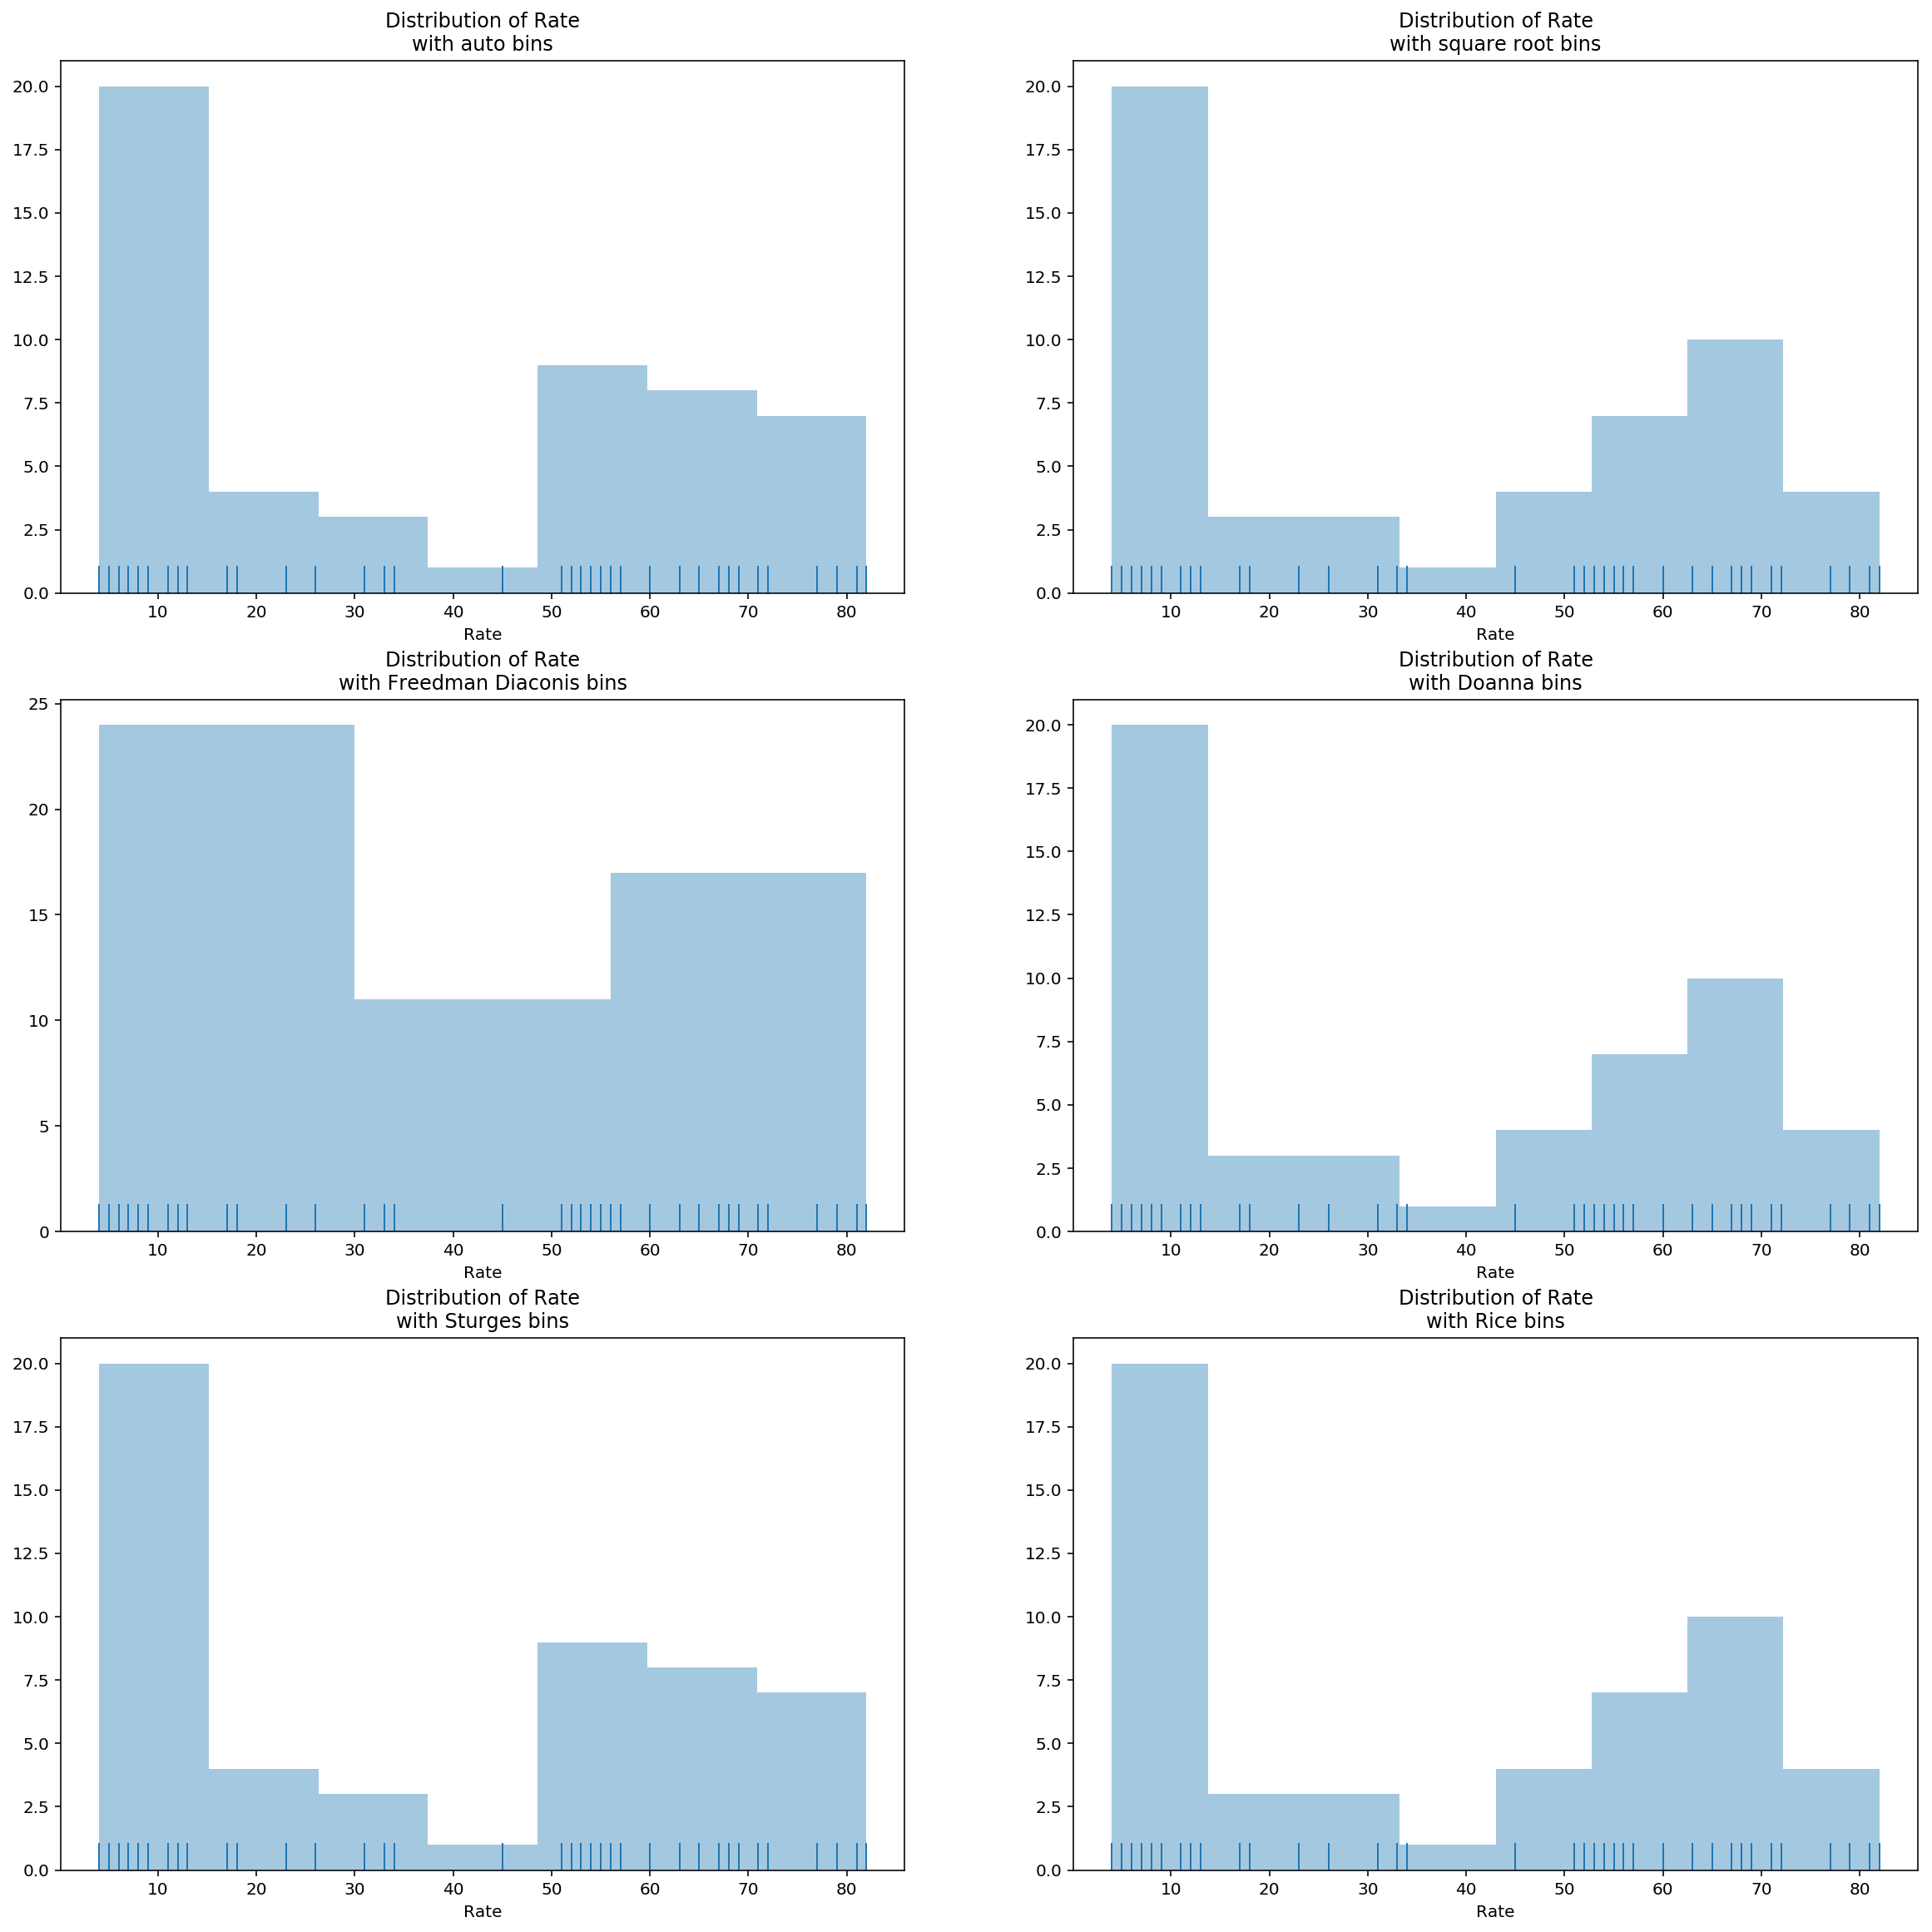

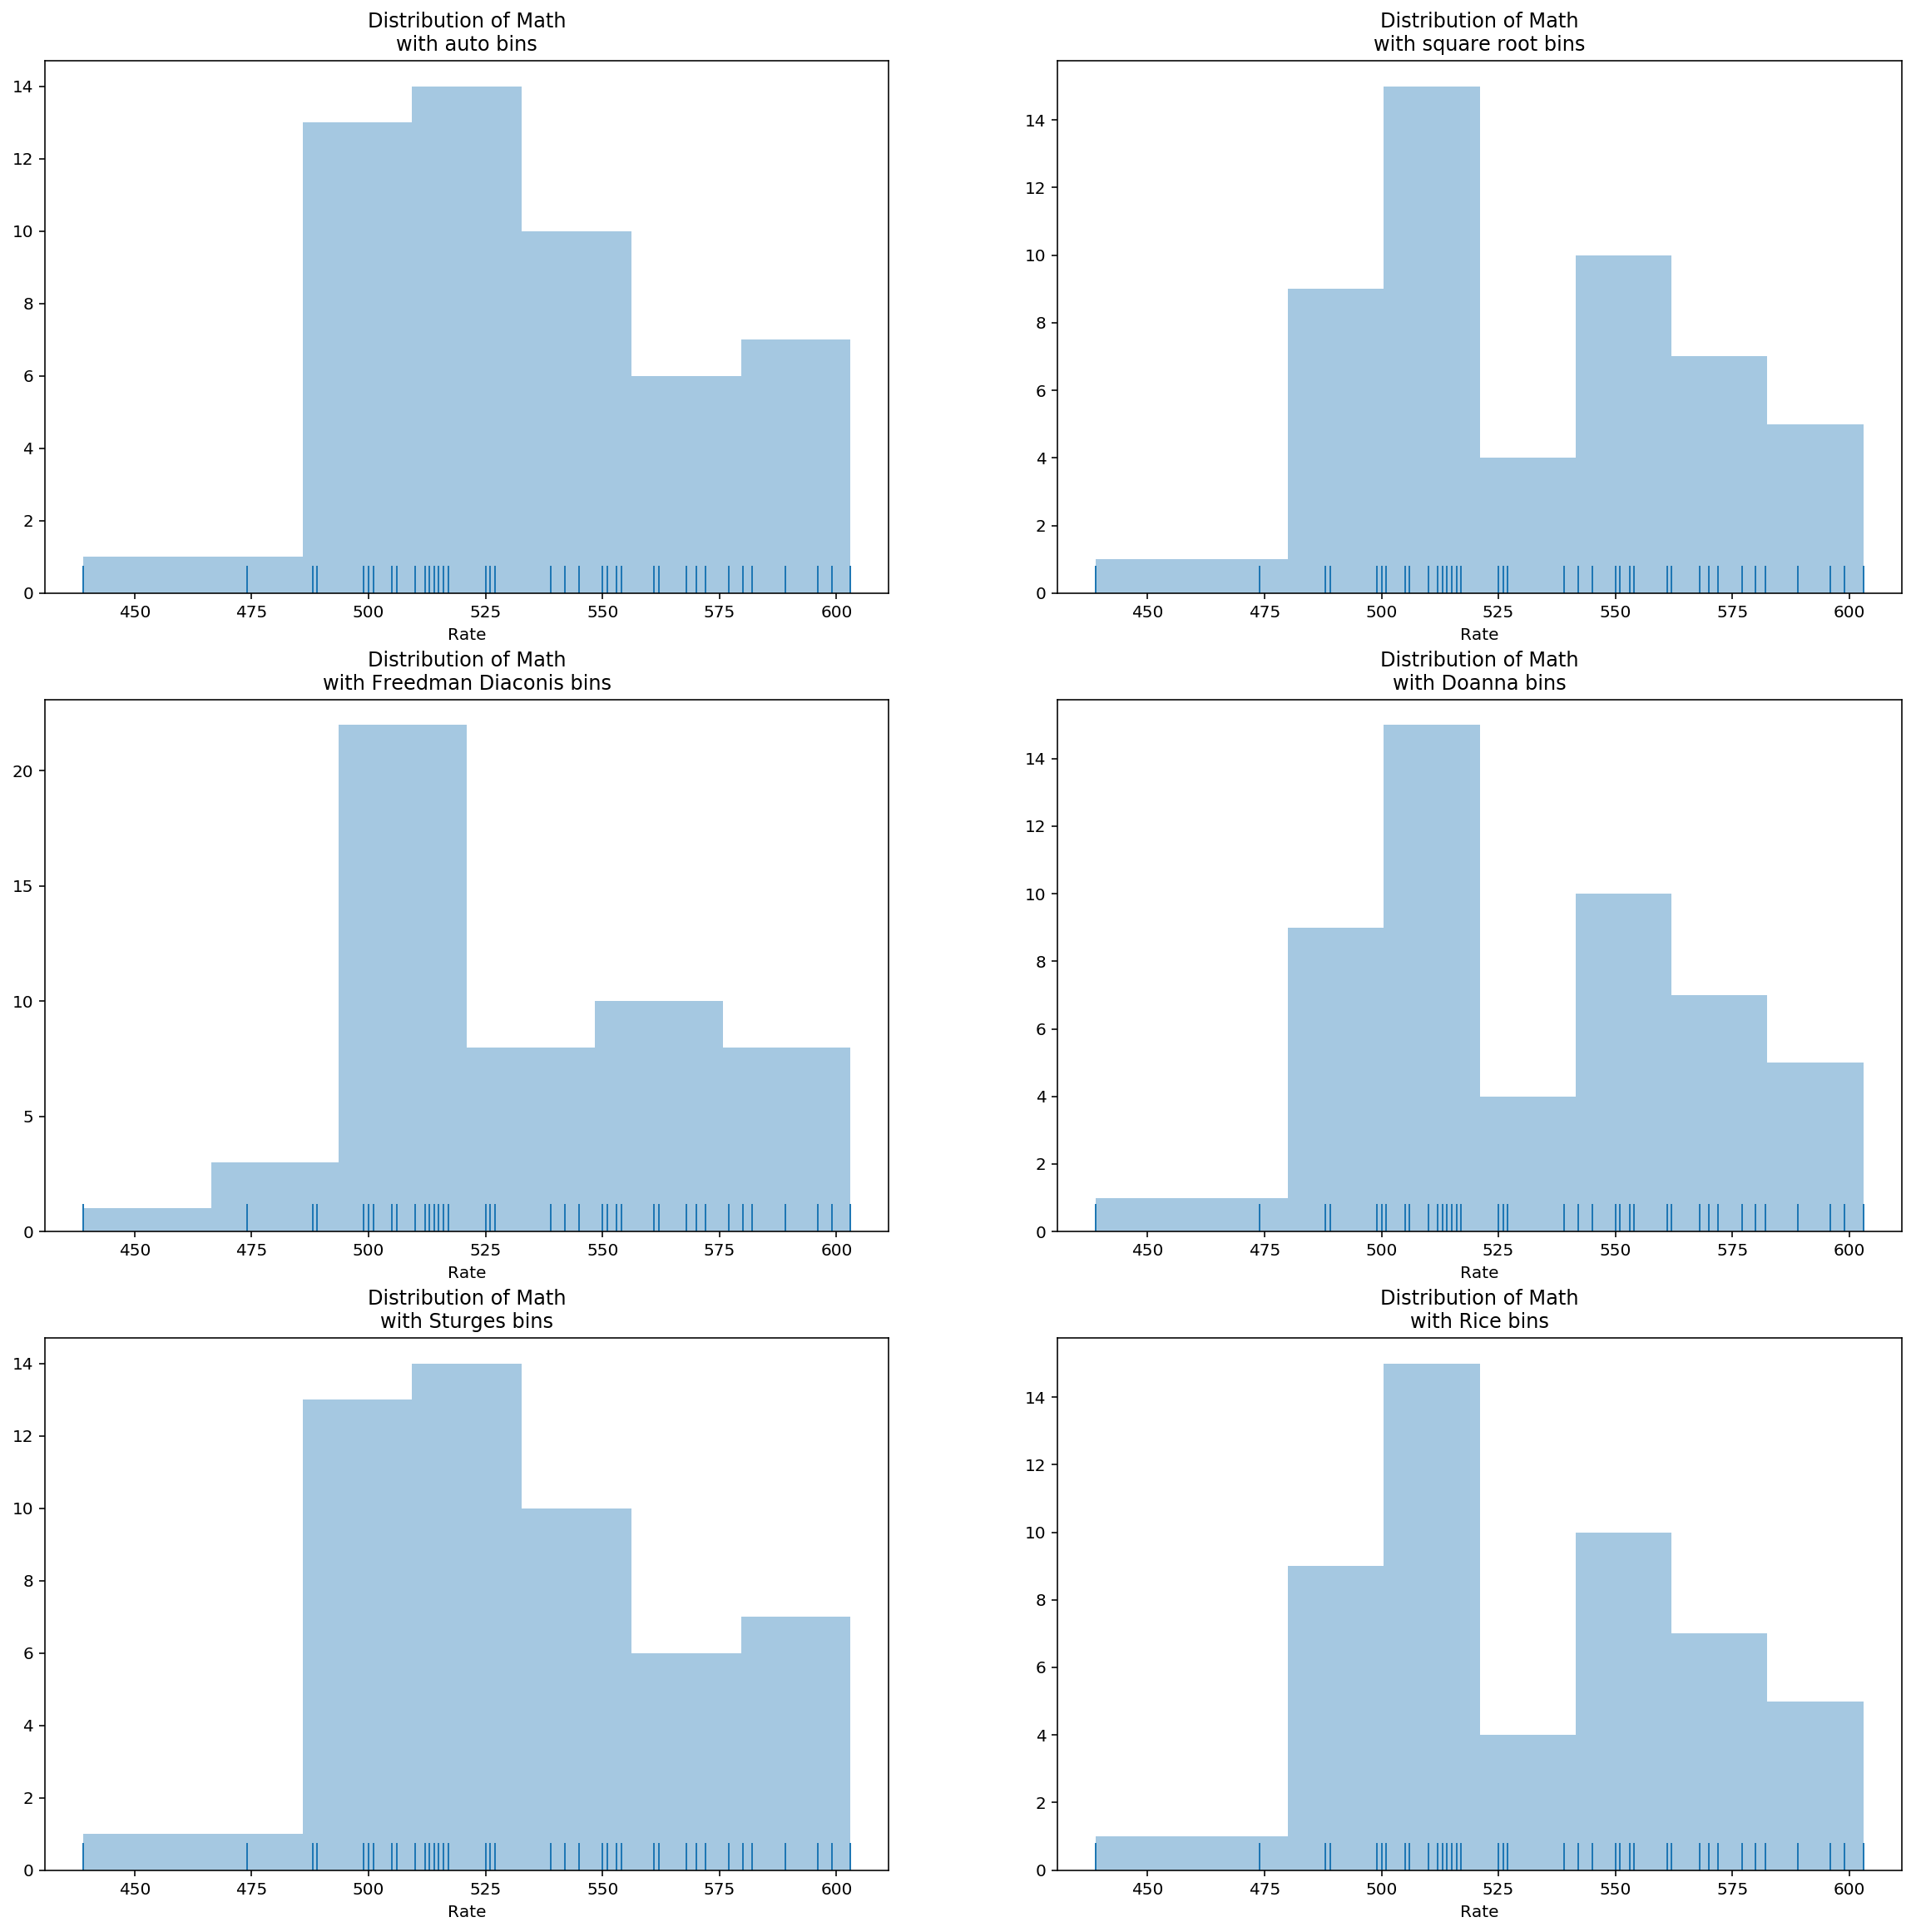

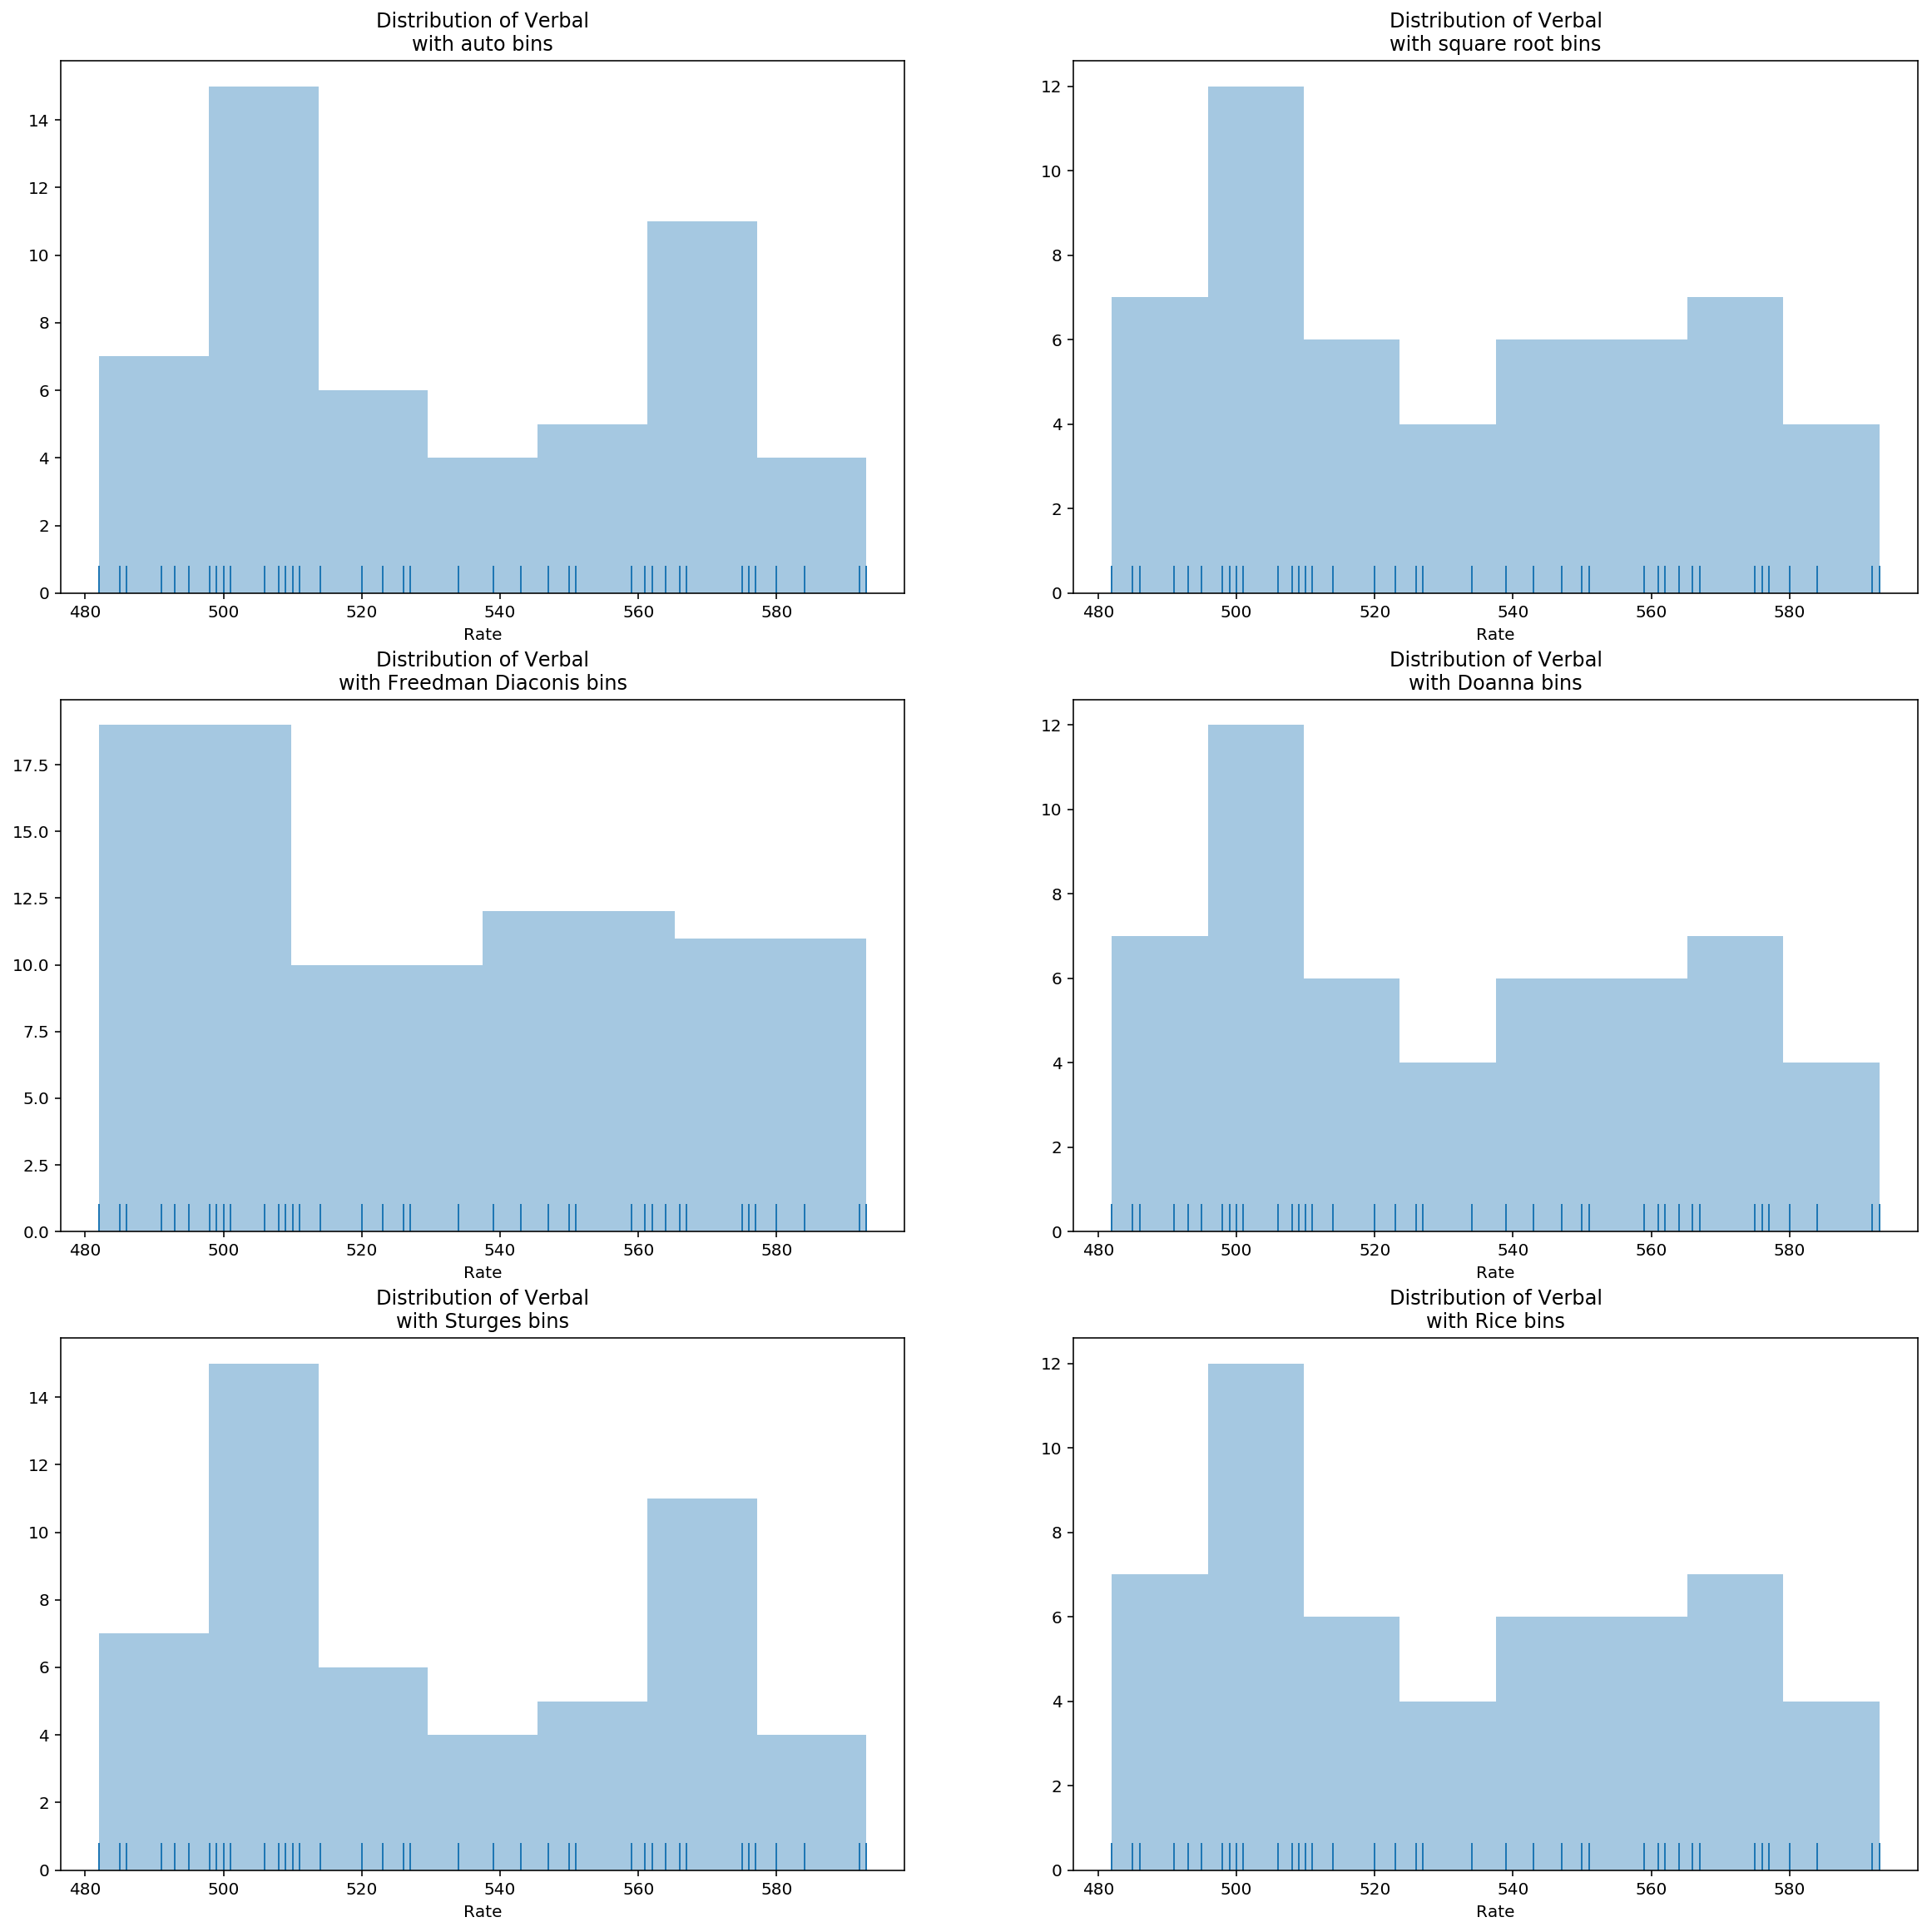

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division

def plot_labels (ax, bins=None, title=None, xlabel=None, ylabel=None):
    """
    plot labels
    Args
        bins (str): Type of bins to be added to title
        title (str): Title of plot
        xlabel (str): Label of x-axis
        ylabel (str): Label of y-axis
    Returns
        None
    """
    if title != None: ax.set_title(title + '\n'+ bins)
    if xlabel != None: ax.set_xlabel(xlabel) 
    if ylabel !=None: ax.set_ylabel(ylabel)
    

def plot_dist (data, title=None,xlabel=None, ylabel=None):
    
    """
    plot distribution of each data column
    
    Args:
        data (DataFrame): DataFrame to be plotted
        title (String, optional)
        xlabel (String, optional)
        ylabel (String, optional)
    Returns:
        None
    """
    fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(20,20))

    sns.distplot(data, rug=True, kde=False, bins='auto',ax=ax1)
    plot_labels(ax1, 'with auto bins', title, 'Rate')
    
    sns.distplot(data,rug=True, kde=False, bins='sqrt',ax=ax2)
    plot_labels(ax2,'with square root bins', title, 'Rate')
    
    sns.distplot(data, rug=True, kde=False, bins='fd',ax=ax3)
    plot_labels(ax3, 'with Freedman Diaconis bins', title, 'Rate')
    
    sns.distplot(data,rug=True, kde=False, bins='doane',ax=ax4)
    plot_labels(ax4,'with Doanna bins', title, 'Rate')
    
    sns.distplot(data, rug=True, kde=False, bins='sturges',ax=ax5)
    plot_labels(ax5, 'with Sturges bins', title, 'Rate')
    
    sns.distplot(data,rug=True, kde=False, bins='rice',ax=ax6)
    plot_labels(ax6,'with Rice bins', title, 'Rate')
    
    plt.show()
    
plot_dist(data['Rate'], title='Distribution of Rate')    
plot_dist(data['Math'], title='Distribution of Math') 
plot_dist(data['Verbal'], title='Distribution of Verbal')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

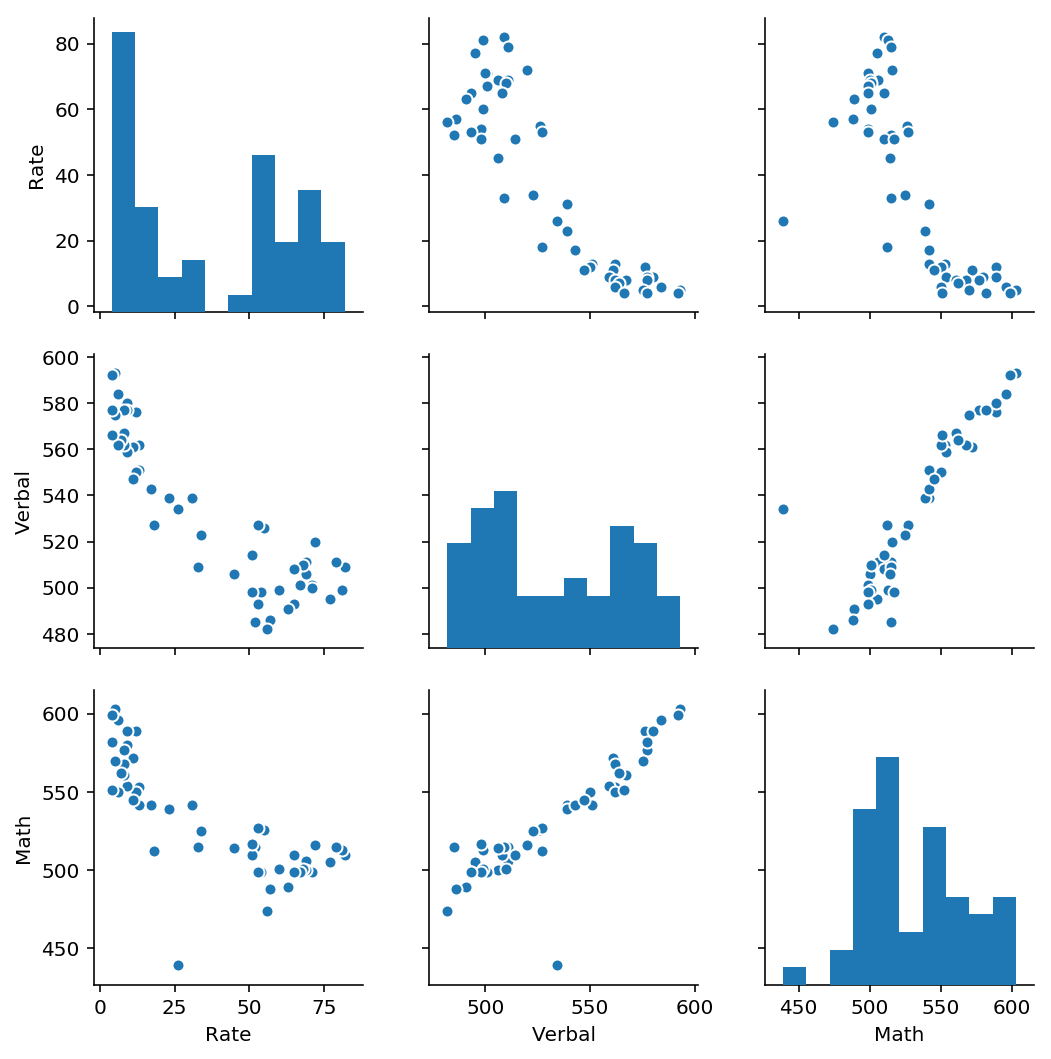

In [112]:
sns.pairplot(data)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

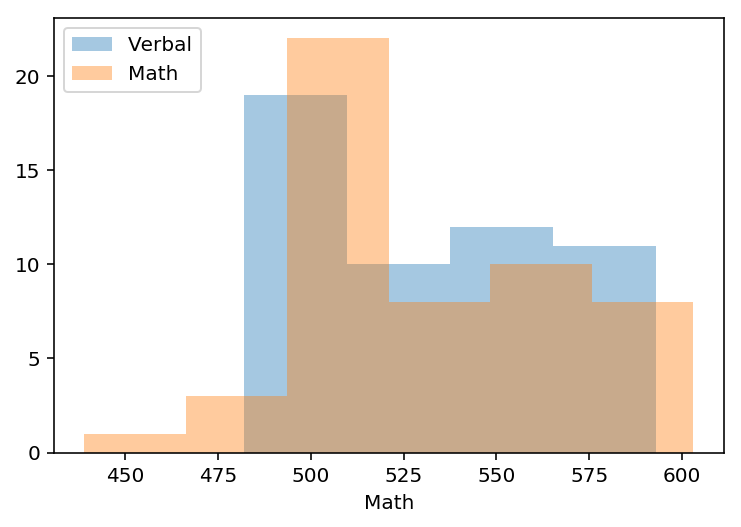

In [113]:
plt.figure(1)
sns.distplot(data['Verbal'], kde=False, label='Verbal')
sns.distplot(data['Math'], kde = False, label='Math')
plt.legend(loc='upper left')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

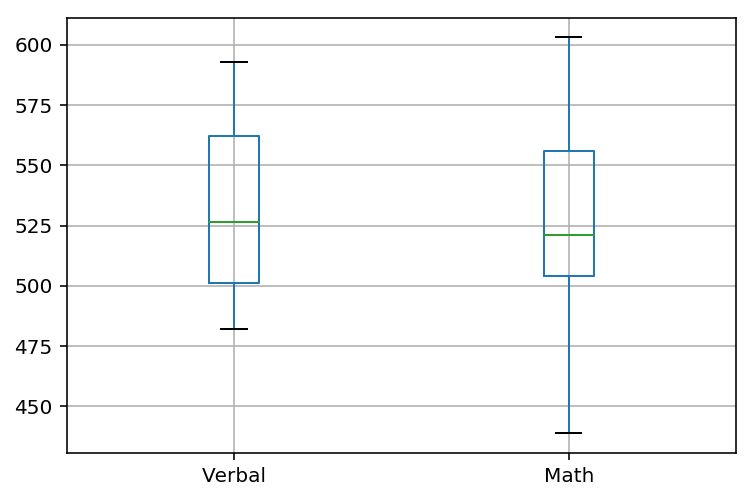

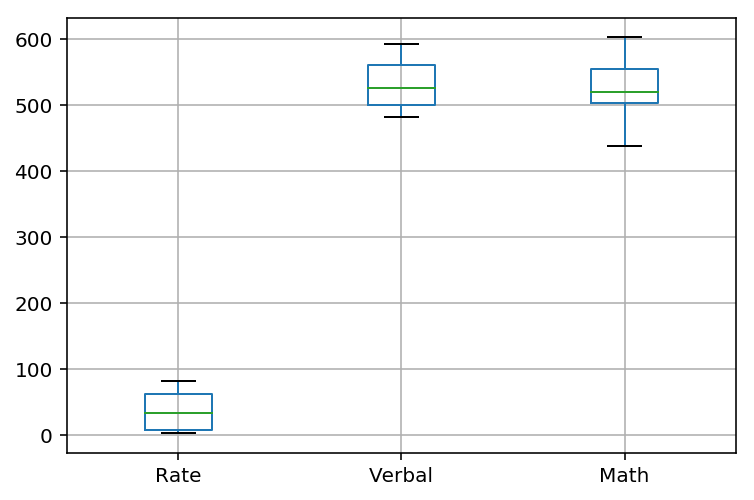

In [114]:
plt.figure()
data[['Verbal', 'Math']].boxplot()
plt.figure()
data.boxplot()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


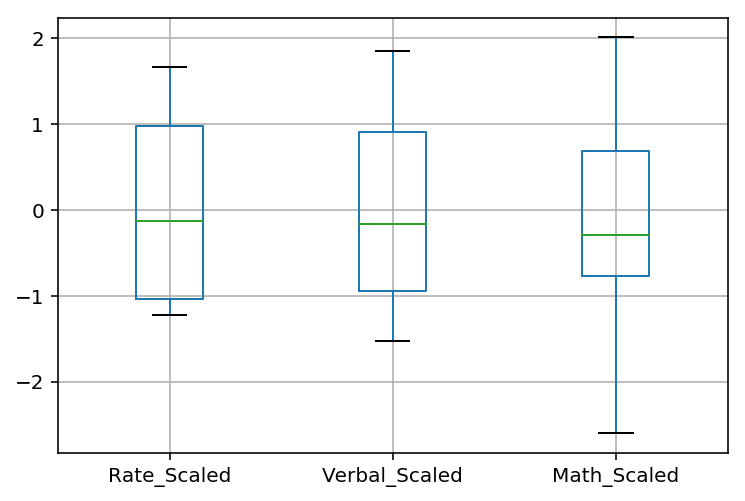

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data['Verbal_Scaled'] = scaler.fit_transform(data['Verbal'].values.reshape(-1,1))
data['Math_Scaled'] = scaler.fit_transform(data['Math'].values.reshape(-1,1))
data['Rate_Scaled'] = scaler.fit_transform(data['Rate'].values.reshape(-1,1))

data[['Rate_Scaled', 'Verbal_Scaled', 'Math_Scaled']].boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




24 is above 52 states


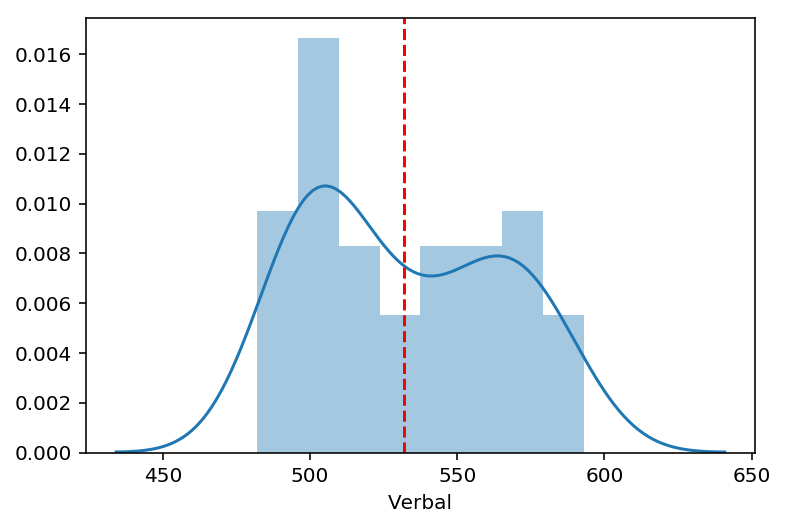

In [116]:
num_of_states_above_mean = data[data['Verbal'] > data['Verbal'].mean()]['State'].count()
num_of_rows = data.shape[0]

print ('{} is above {} states'.format(num_of_states_above_mean, num_of_rows))

sns.distplot(data['Verbal'], bins='sqrt')
plt.axvline(data['Verbal'].mean(), linestyle='--',color='red')

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [117]:
num_of_states_above_median = data[data['Verbal'] > data['Verbal'].median()]['State'].count()
print ('{} is above {} states'.format(num_of_states_above_median, num_of_rows))

26 is above 52 states


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [118]:
data['Verbal_Sub_Math'] = data['Verbal'] - data['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [119]:
first_dataframe = pd.DataFrame (data.iloc[data['Verbal_Sub_Math'].abs().sort_values(ascending=False).where(data['Verbal'] > data['Math']).dropna()[:10].index, 0]).reset_index().drop('index',axis=1)

first_dataframe[:3]

,State
0,OH
1,WV
2,MS


In [120]:
second_dataframe = pd.DataFrame (data.iloc[data['Verbal_Sub_Math'].abs().sort_values().where(data['Math'] > data['Verbal']).dropna()[:10].index, 0]).reset_index().drop('index', axis=1)

second_dataframe[:3]

,State
0,FL
1,CT
2,AZ


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [121]:
corr_matrix = data[['Rate', 'Verbal', 'Math']].corr()
corr_matrix

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


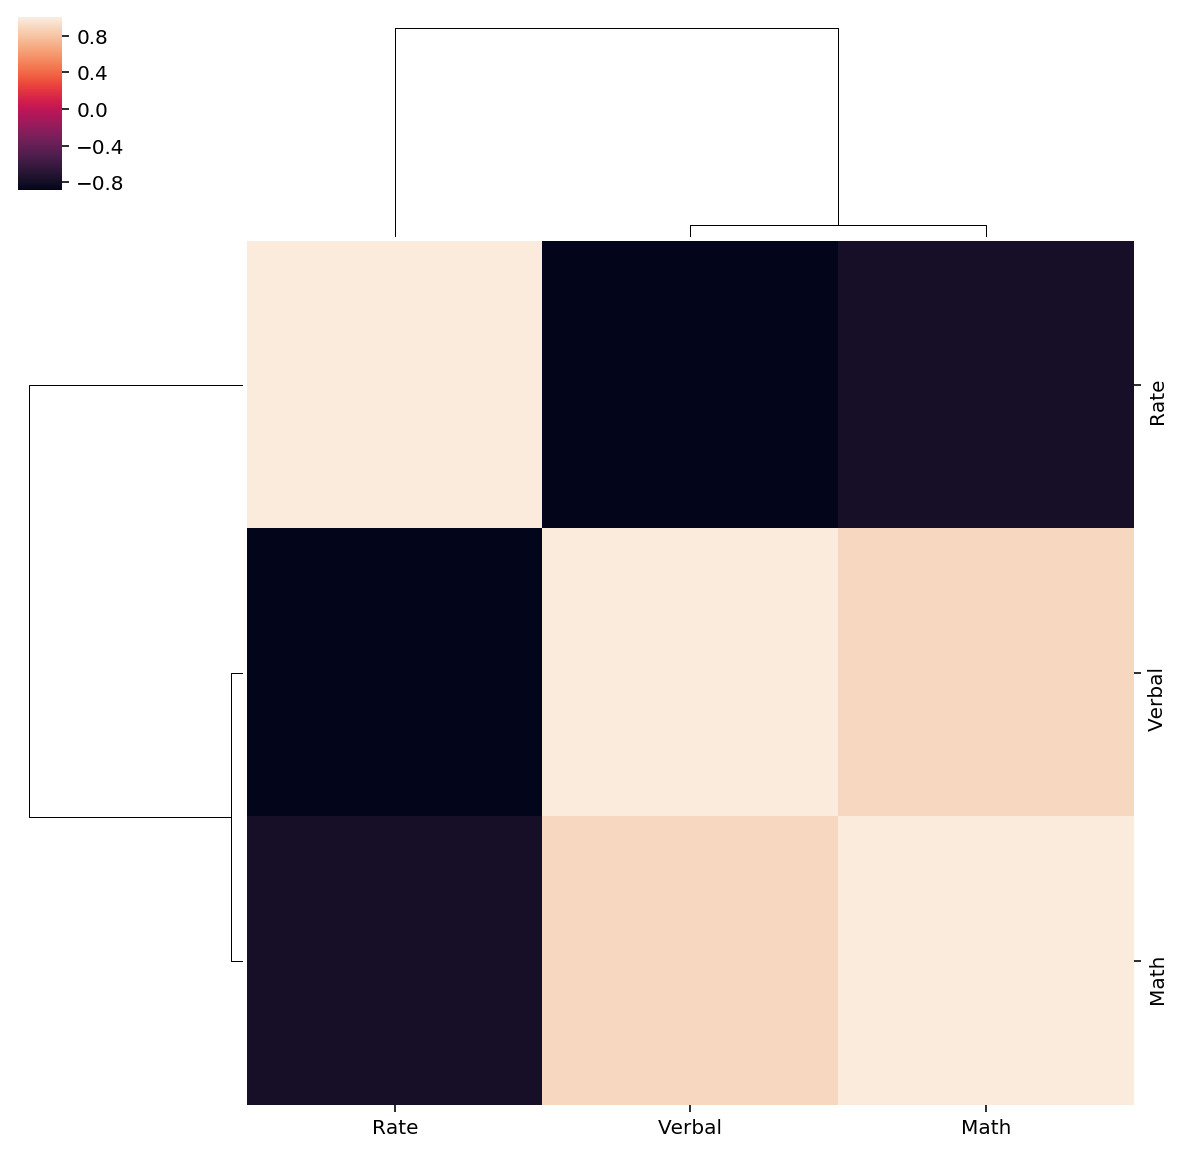

In [122]:
sns.clustermap(corr_matrix)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [123]:
corr_matrix.describe()

,Rate,Verbal,Math
count,3.000000,3.000000,3.000000
mean,-0.220059,0.337813,0.375375
std,1.058104,1.061409,0.996427
min,-0.886432,-0.886432,-0.773746
25%,-0.830089,0.006719,0.063062
50%,-0.773746,0.899871,0.899871
75%,0.113127,0.949935,0.949935
max,1.000000,1.000000,1.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [124]:
cov_matrix = data[['Rate', 'Verbal', 'Math']].cov()
cov_matrix
print (data['Rate'].std()**2)
cov_matrix

745.387631976


,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


$Cor (X,y) = \frac{Cov(X,y)}{sd(x) sd(y)} $

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [125]:
drug_data = pd.read_csv('drug-use-by-age.csv')
drug_data.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [126]:
drug_data.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [127]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [128]:
drug_data.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [129]:
drug_data['meth-frequency']

0         -
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16        -
Name: meth-frequency, dtype: object

In [130]:
drug_data['cocaine-frequency']

0      5.0
1      1.0
2      5.5
3      4.0
4      7.0
5      5.0
6      5.0
7      5.5
8      8.0
9      5.0
10     5.0
11     6.0
12     5.0
13     8.0
14    15.0
15    36.0
16       -
Name: cocaine-frequency, dtype: object

In [131]:
drug_data_cleaned = pd.read_csv('drug-use-by-age.csv', na_values = '-')
drug_data_cleaned.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [132]:
drug_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [133]:
drug_data_cleaned['age'] =drug_data_cleaned['age'].str.replace('+','')

In [134]:
import re
drug_data_cleaned['age']=[re.findall('\d+',str(x))[0] for x in drug_data_cleaned['age']]

In [135]:
drug_data_cleaned['age'] = pd.to_numeric(drug_data_cleaned['age'])

In [136]:
drug_data_cleaned.fillna(0,inplace=True)

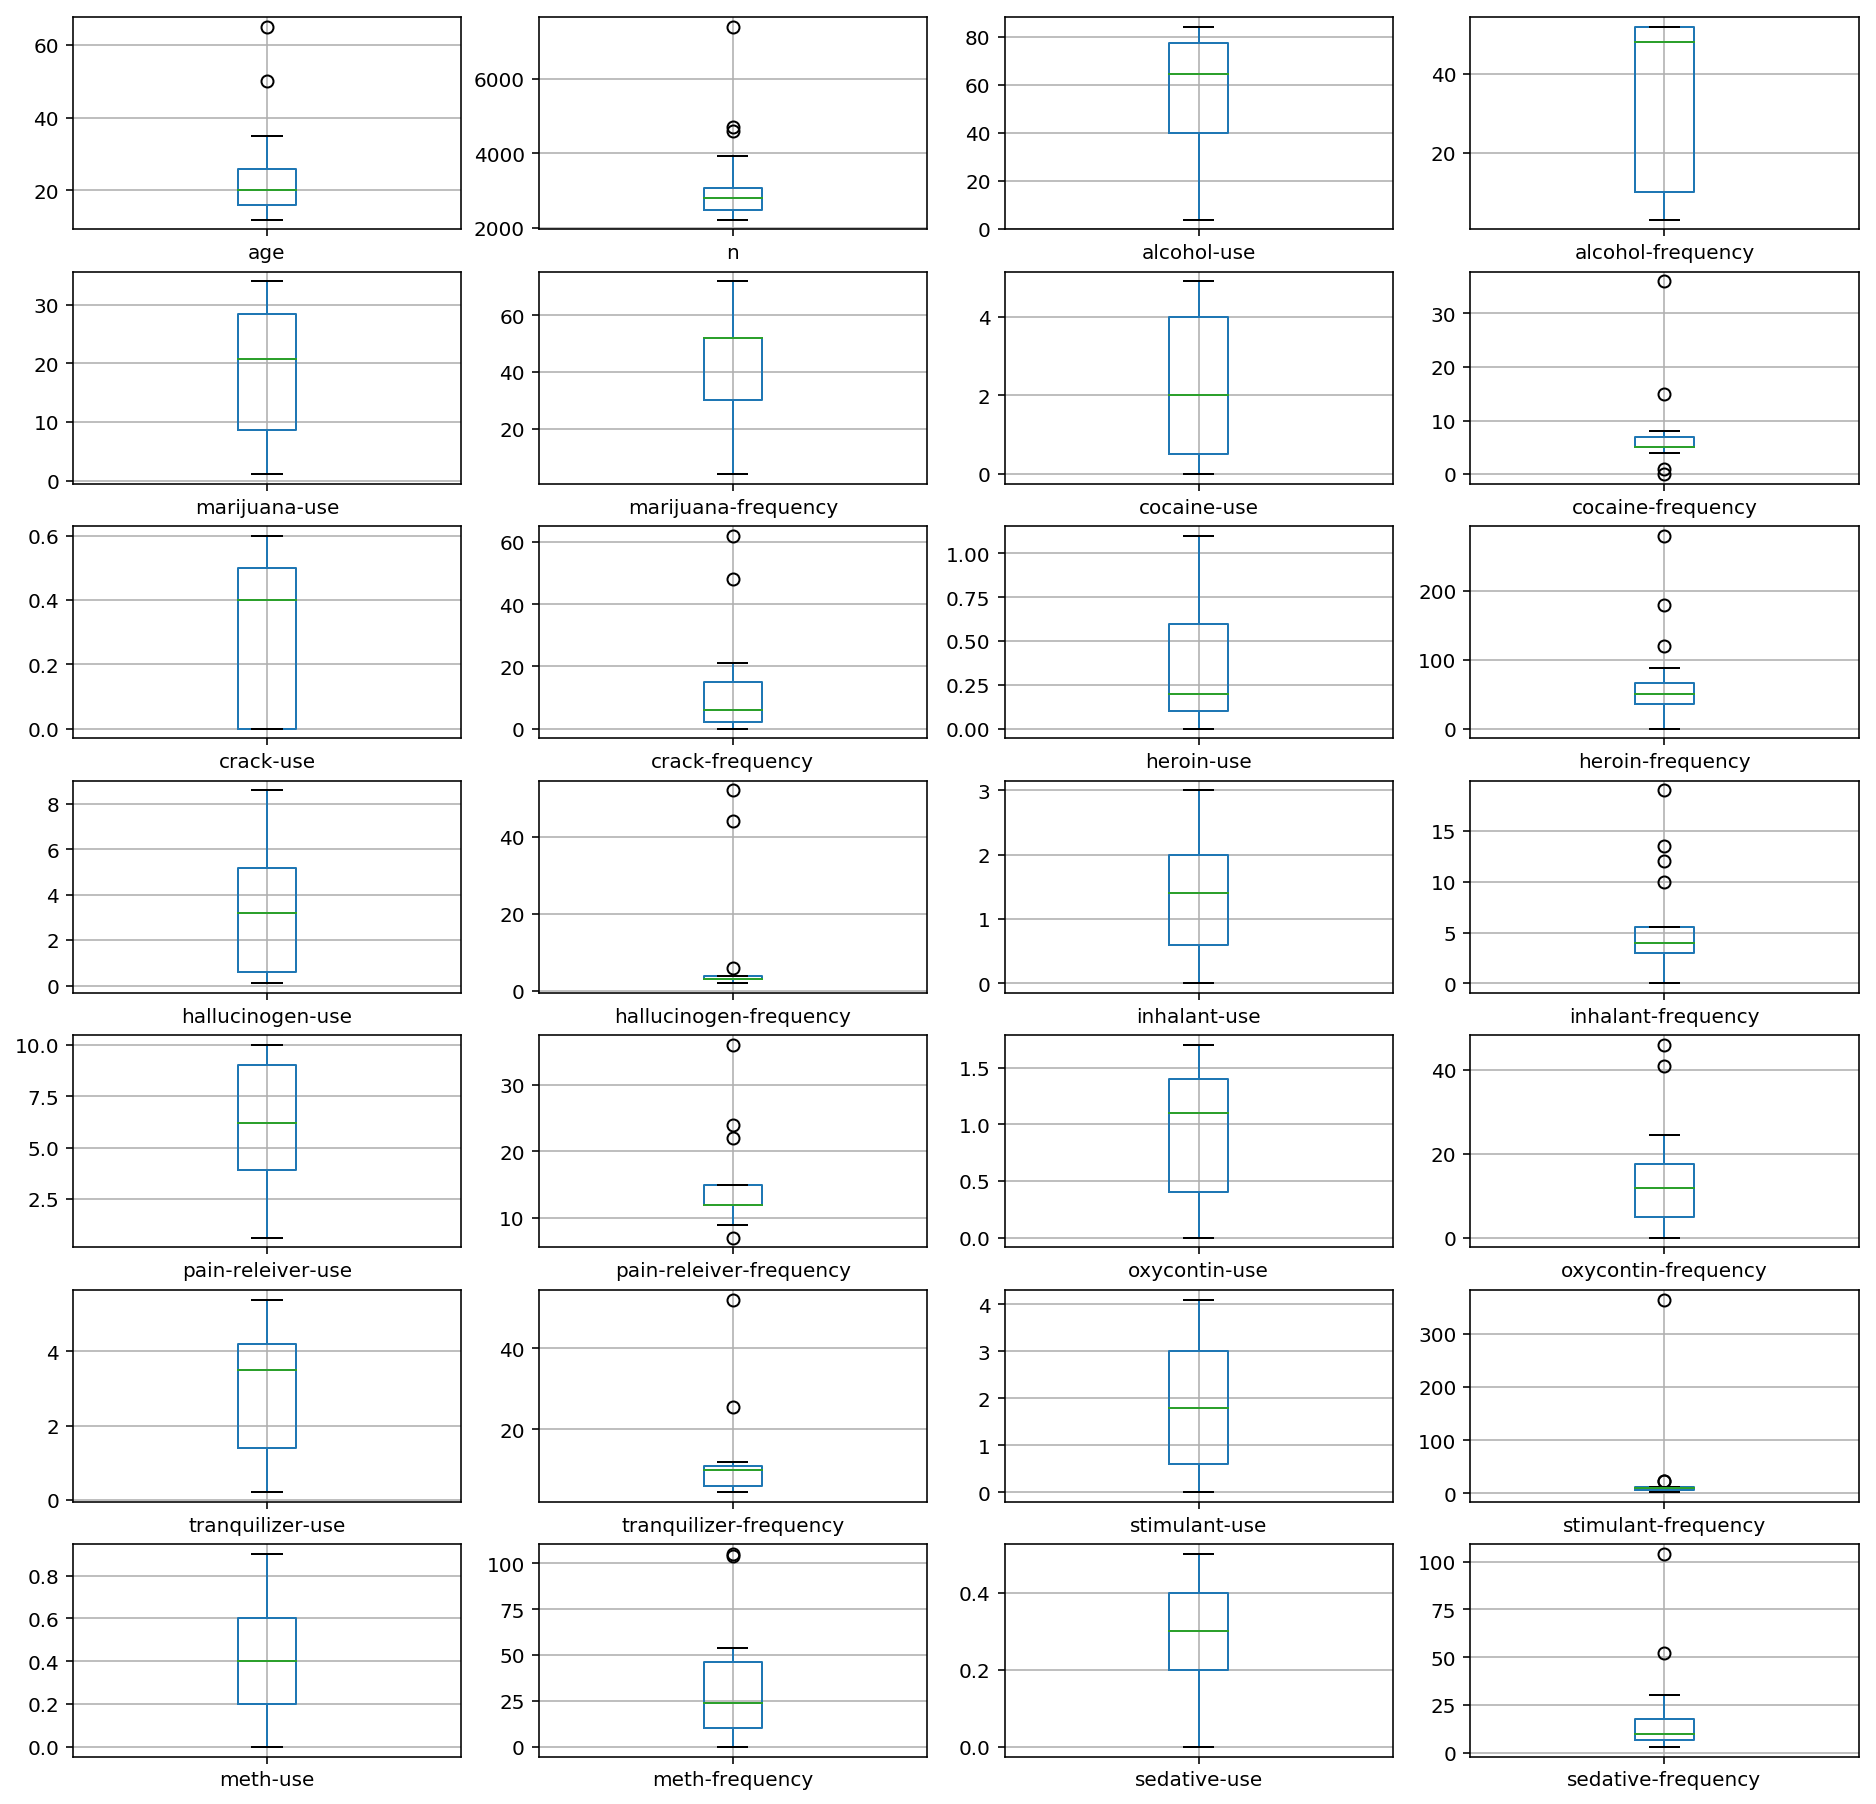

In [137]:
fig, ax = plt.subplots(nrows =7, ncols=4, figsize=(16,16))

for idx, c in enumerate(drug_data_cleaned.columns):
    ax_r = int(idx/4)
    ax_c = int(idx%4)
    drug_data_cleaned[[c]].boxplot(ax=ax[ax_r,ax_c])

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [138]:
drug_data_cleaned.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


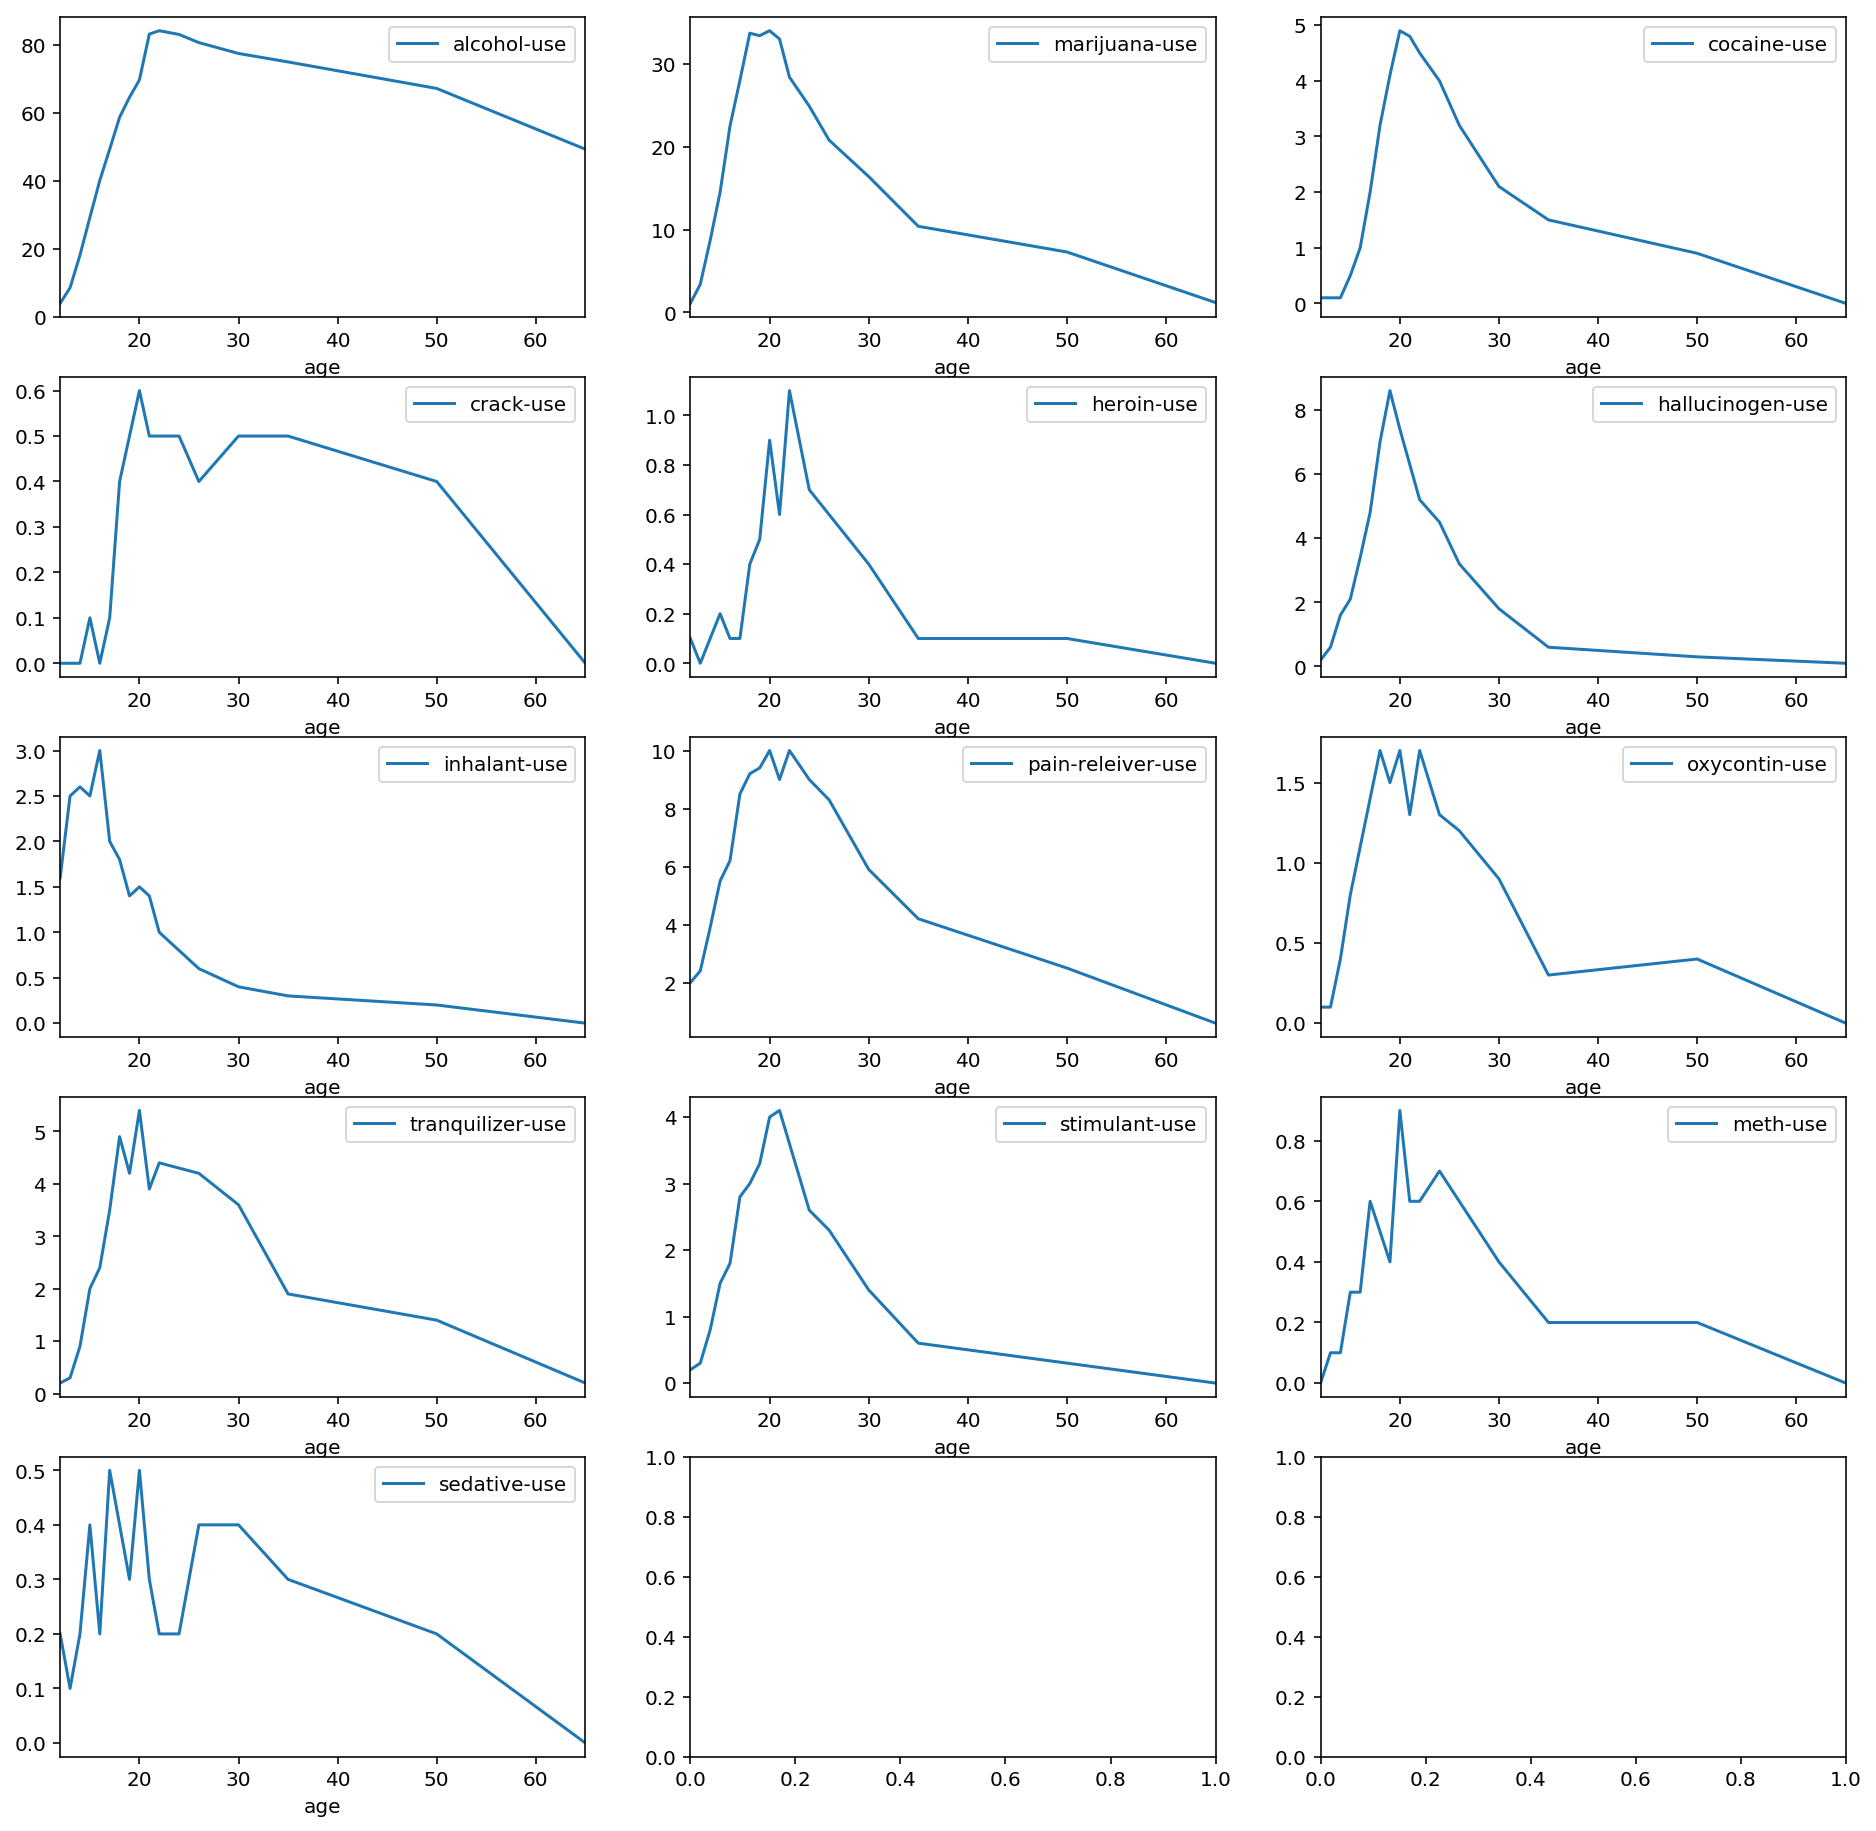

In [139]:
fig, ax = plt.subplots(nrows=5, ncols=3,figsize=(16,16))
for idx, c in enumerate(drug_data_cleaned.iloc[:,2::2].columns):
    ax_r=int(idx/3)
    ax_c=int(idx%3)
    drug_data_cleaned.plot(x='age', y=c, ax=ax[ax_r,ax_c])

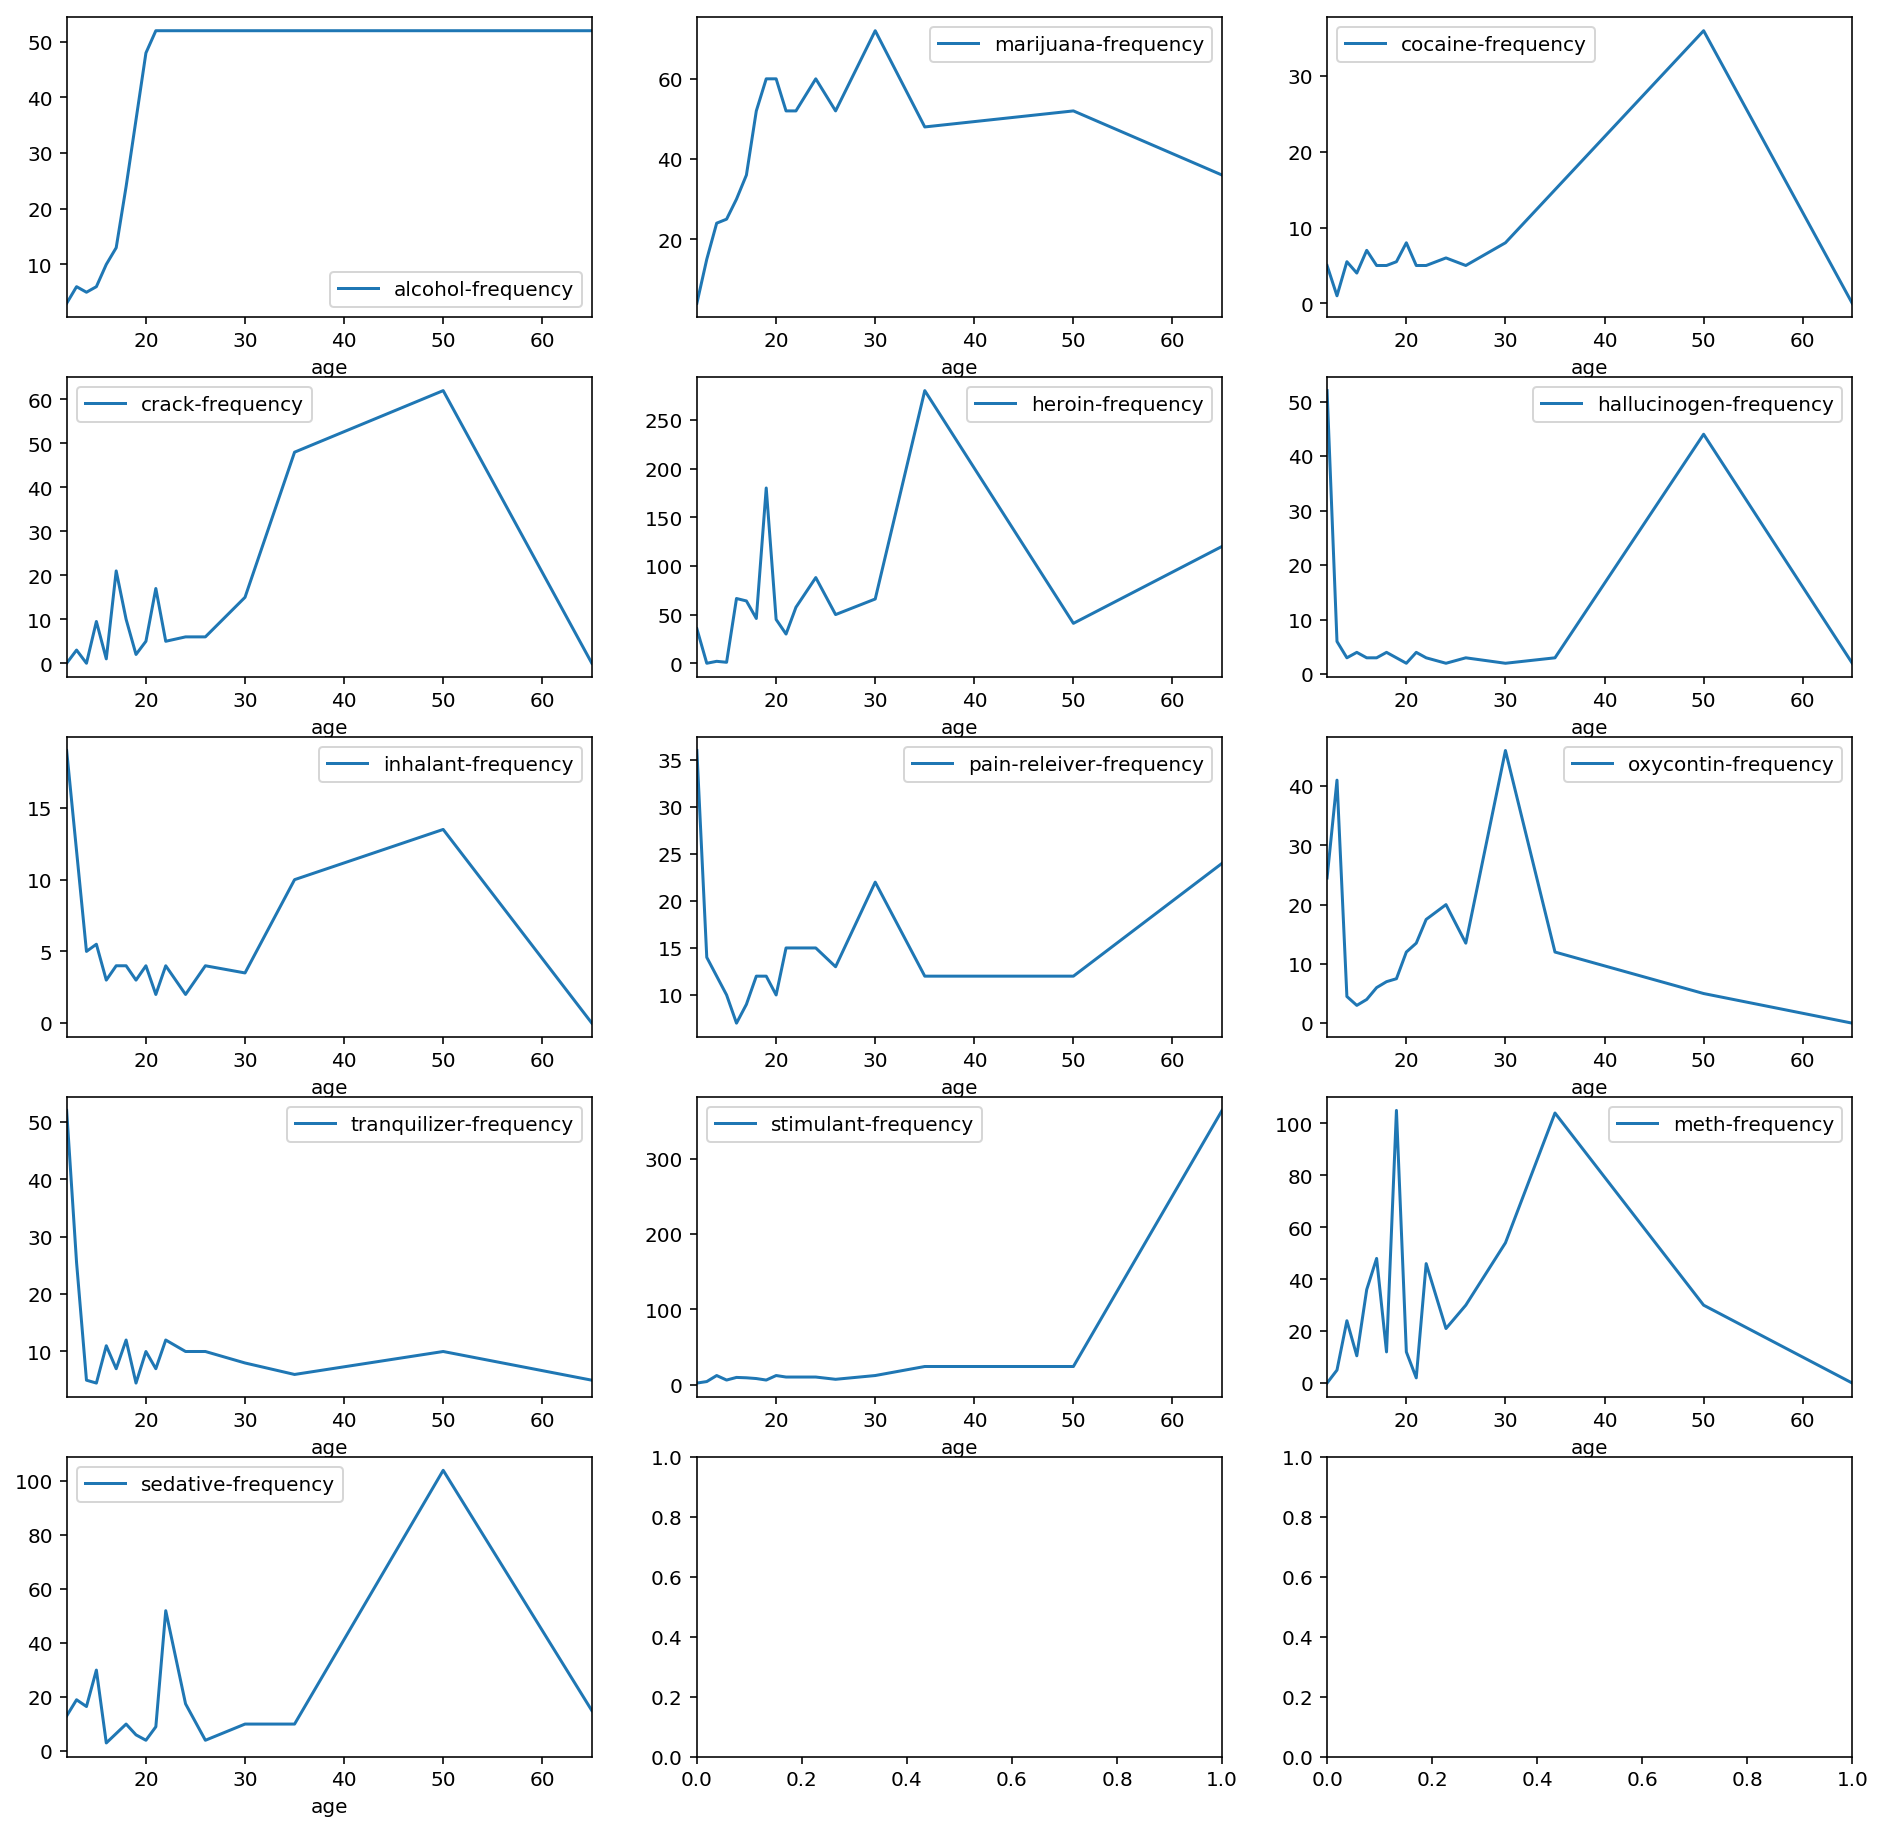

In [140]:
fig, ax = plt.subplots(nrows=5, ncols=3,figsize=(16,16))
for idx, c in enumerate(drug_data_cleaned.iloc[:,3::2].columns):
    ax_r=int(idx/3)
    ax_c=int(idx%3)
    drug_data_cleaned.plot(x='age', y=c, ax=ax[ax_r,ax_c])

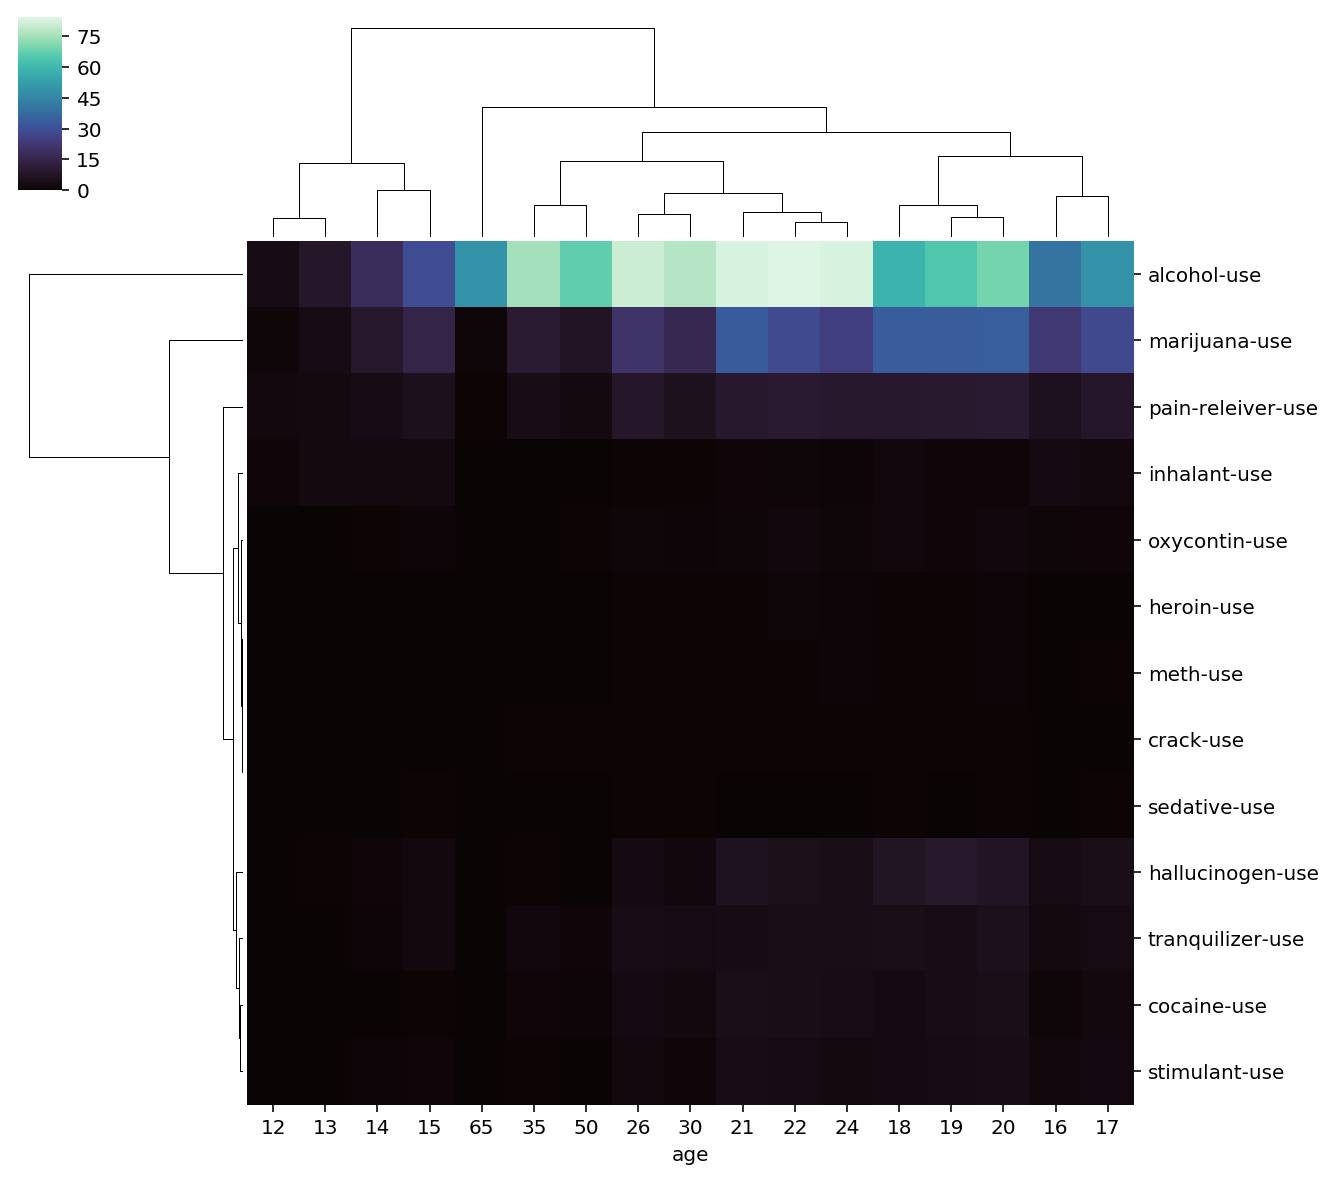

In [141]:
use_df=pd.DataFrame()
for c in drug_data_cleaned.iloc[:,2::2].columns:
    use_df=use_df.append(drug_data_cleaned[c],ignore_index=True)

use_df.index = drug_data_cleaned.iloc[:,2::2].columns
use_df.columns=drug_data_cleaned['age']

sns.clustermap(use_df, cmap="mako")

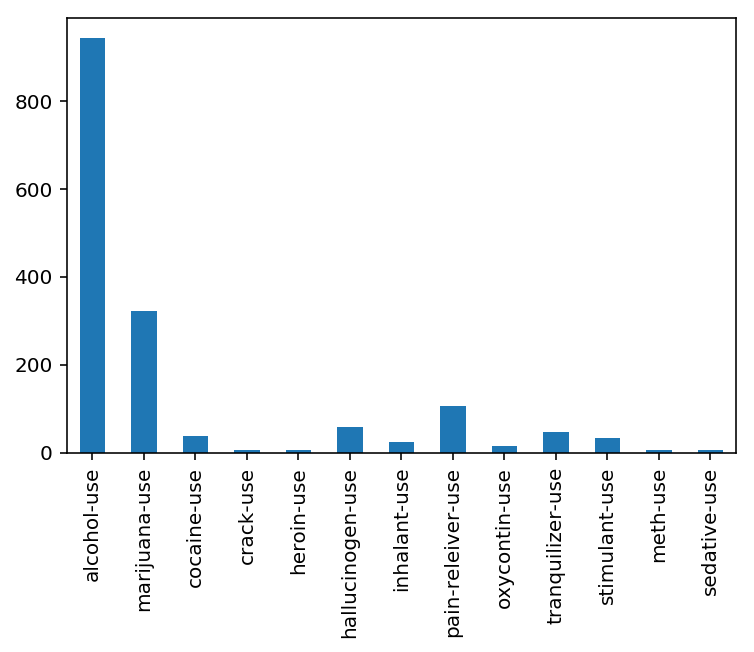

In [142]:
use_df.sum(axis=1).plot.bar()

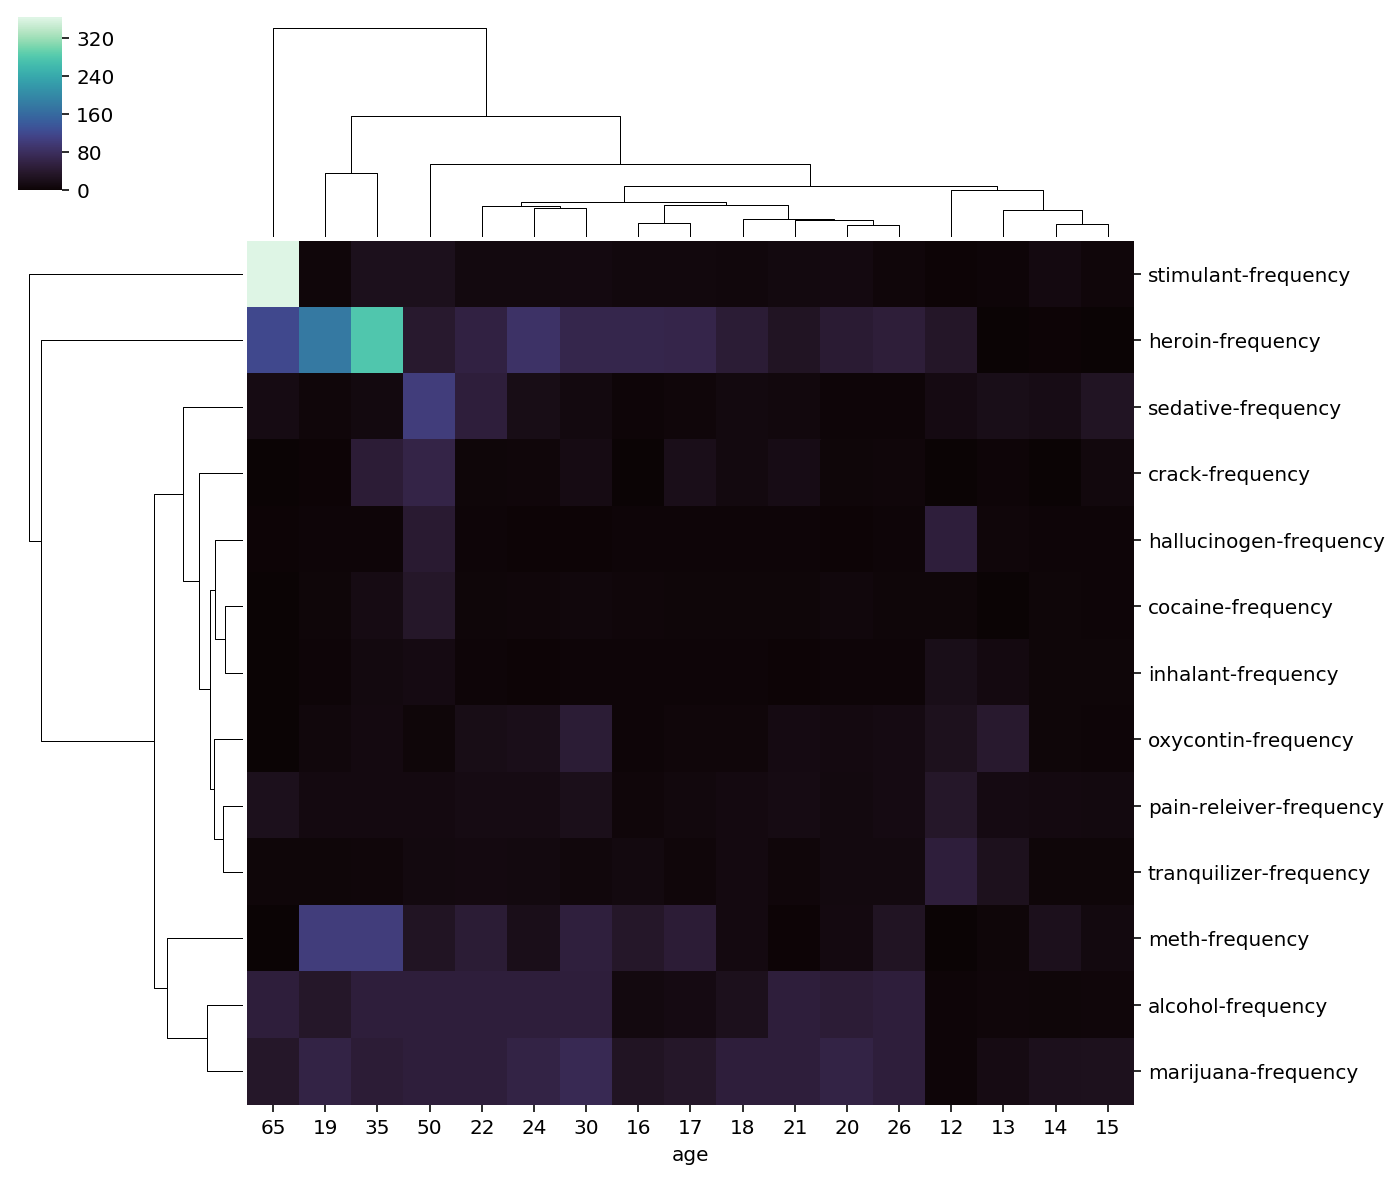

In [143]:
freq_df=pd.DataFrame()
for c in drug_data_cleaned.iloc[:,3::2].columns:
    freq_df=freq_df.append(drug_data_cleaned[c],ignore_index=True)

freq_df.index = drug_data_cleaned.iloc[:,3::2].columns
freq_df.columns=drug_data_cleaned['age']

sns.clustermap(freq_df, cmap="mako")

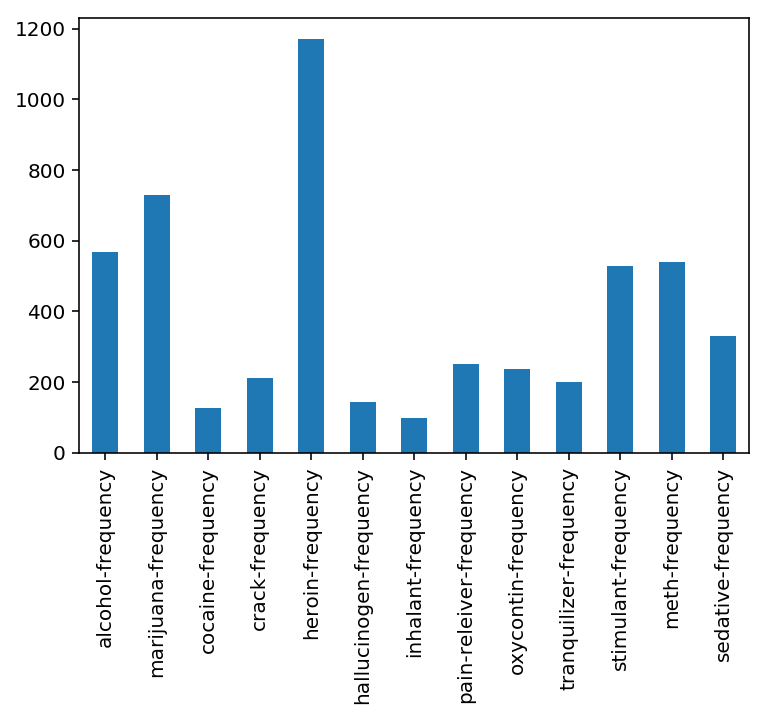

In [144]:
freq_df.sum(axis=1).plot.bar()

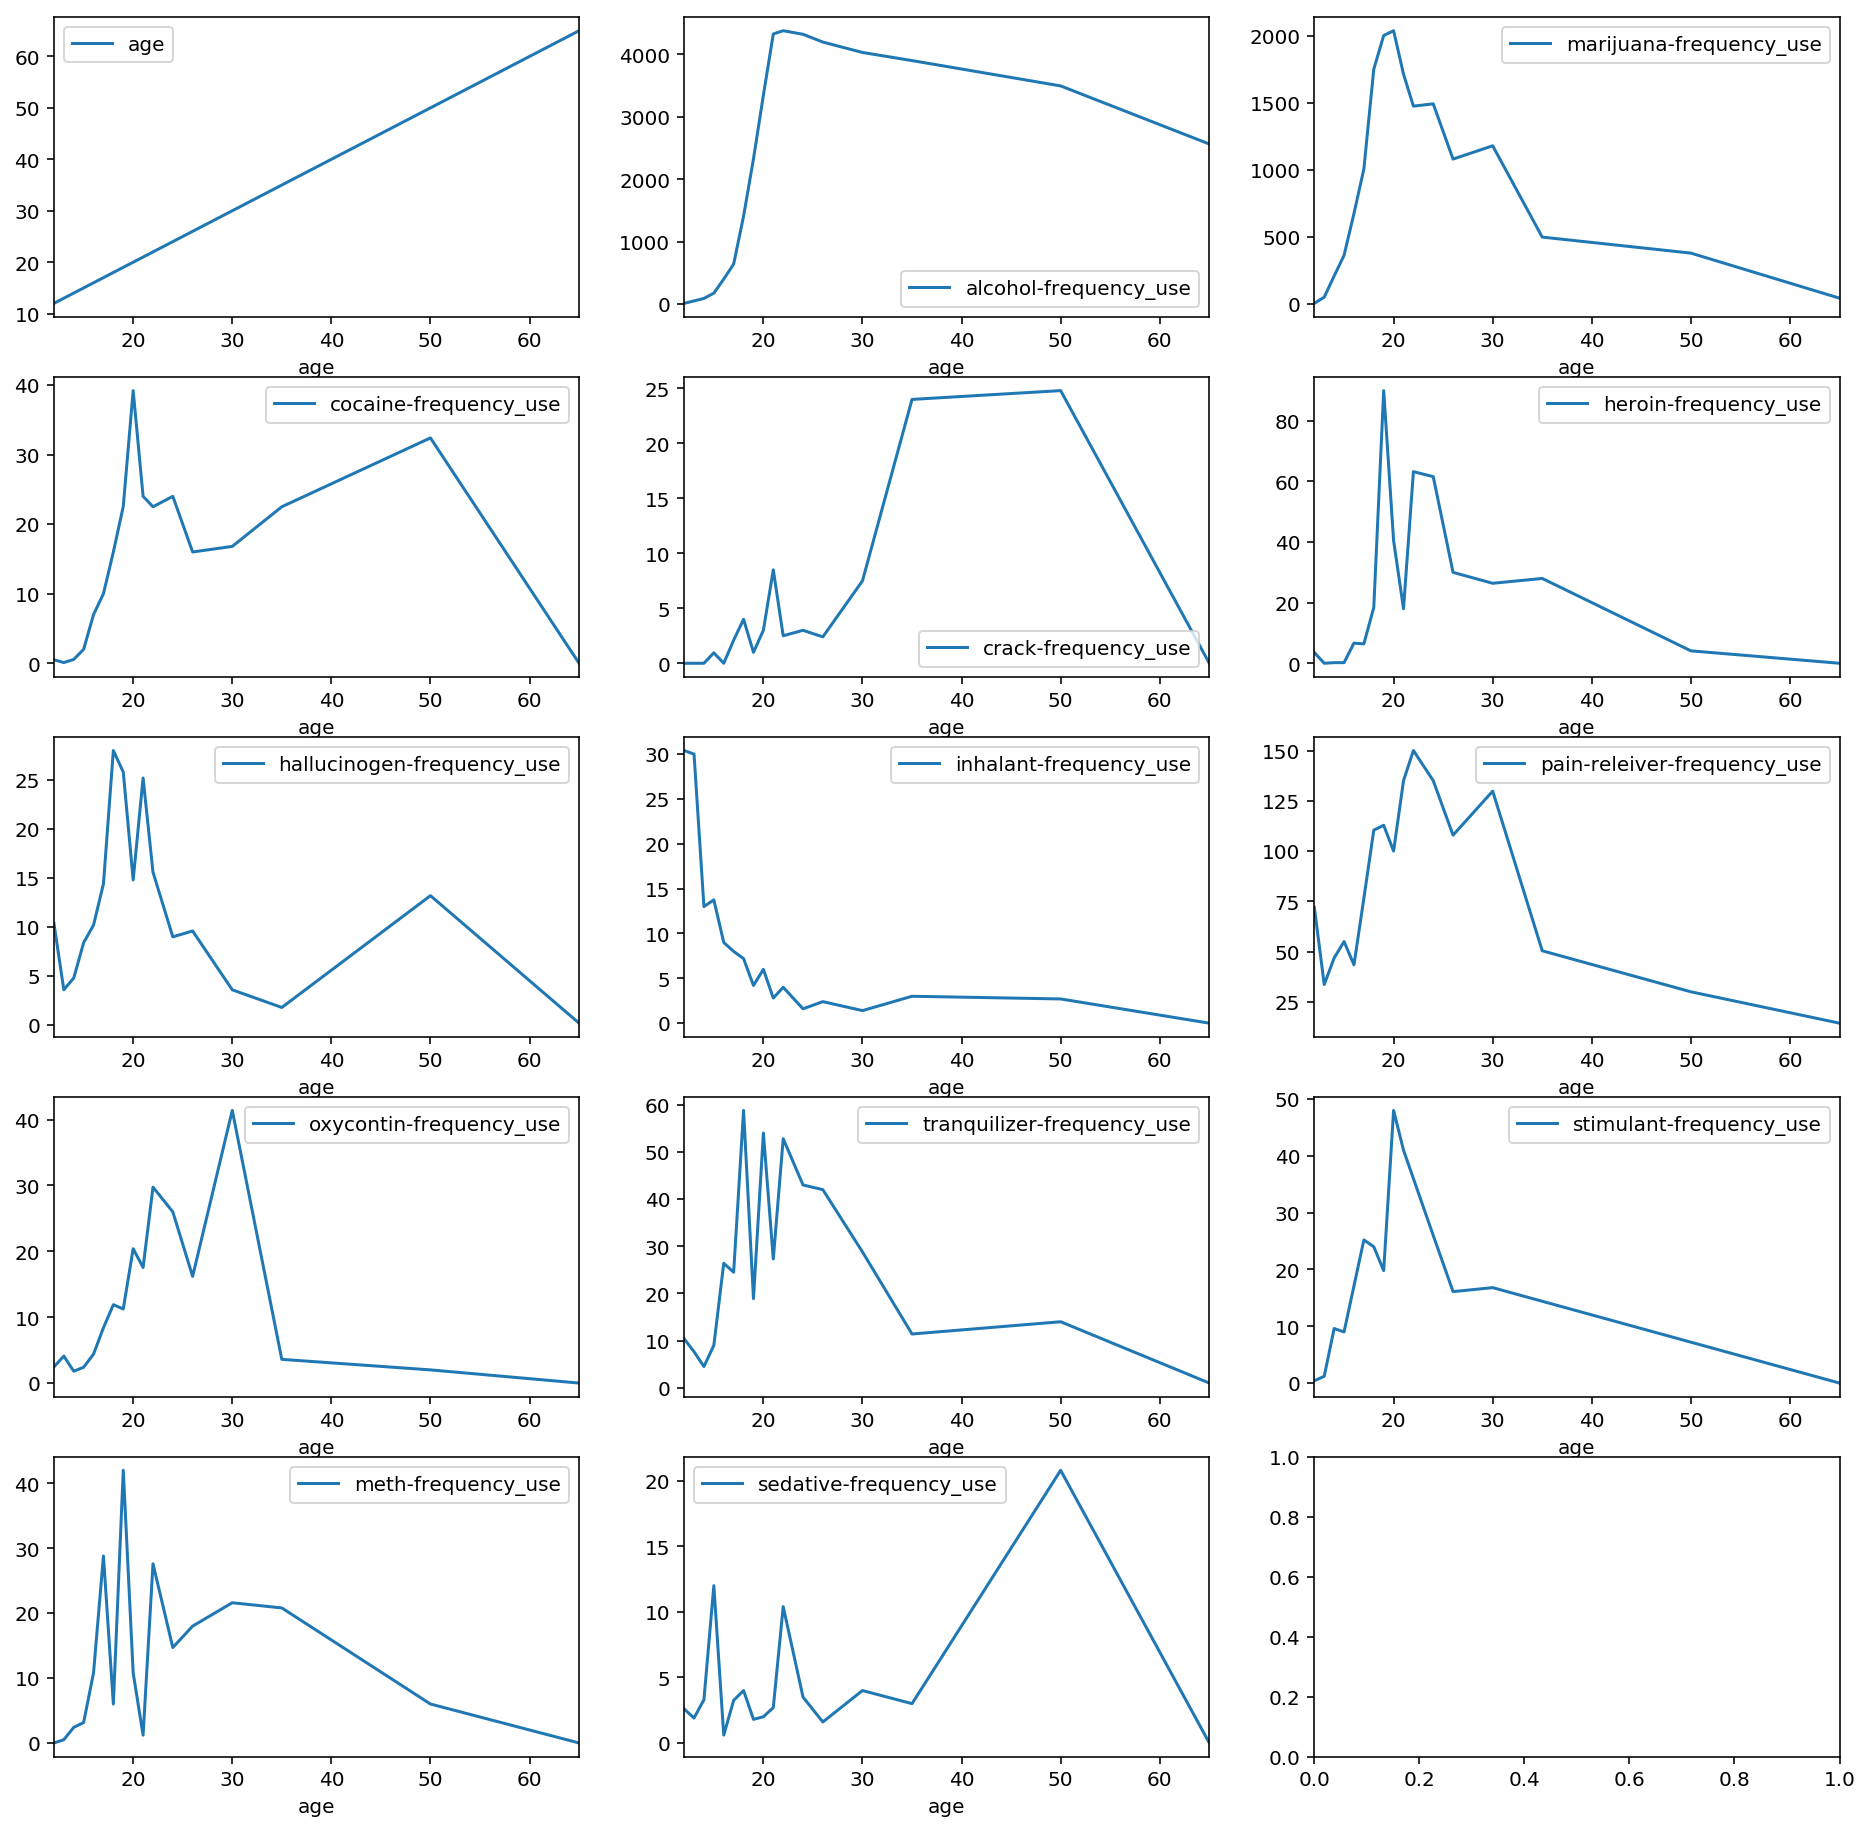

In [145]:
freq_use_cross=pd.DataFrame()
rng=int((drug_data_cleaned.shape[1]-2)/2)

for i in range(rng):
    i=i*2+2
    use_freq=drug_data_cleaned.iloc[:,i] * drug_data_cleaned.iloc[:,i+1]
    freq_use_cross=freq_use_cross.append(use_freq,ignore_index=True)

freq_use_cross.index = [col + '_use' for col in drug_data_cleaned.iloc[:,3::2].columns]
freq_use_cross.columns=drug_data_cleaned['age']
freq_use_cross=freq_use_cross.T
freq_use_cross.reset_index(inplace=True)

fig, ax = plt.subplots(nrows=5, ncols=3,figsize=(16,16))
for idx, c in enumerate(freq_use_cross.columns):
    ax_r=int(idx/3)
    ax_c=int(idx%3)
    freq_use_cross.plot(x=freq_use_cross['age'], y=c, ax=ax[ax_r,ax_c])
    

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [146]:
drug_data_cleaned.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [147]:
drug_data_cleaned.mean(axis=0)

age                          24.529412
n                          3251.058824
alcohol-use                  55.429412
alcohol-frequency            33.352941
marijuana-use                18.923529
marijuana-frequency          42.941176
cocaine-use                   2.176471
cocaine-frequency             7.411765
crack-use                     0.294118
crack-frequency              12.382353
heroin-use                    0.352941
heroin-frequency             68.970588
hallucinogen-use              3.394118
hallucinogen-frequency        8.411765
inhalant-use                  1.388235
inhalant-frequency            5.794118
pain-releiver-use             6.270588
pain-releiver-frequency      14.705882
oxycontin-use                 0.935294
oxycontin-frequency          13.941176
tranquilizer-use              2.805882
tranquilizer-frequency       11.735294
stimulant-use                 1.917647
stimulant-frequency          31.147059
meth-use                      0.382353
meth-frequency           

Doing t-test on alcohol-use and alcohol-frequency
p-value is 0.0123086088738 

Doing t-test on marijuana-use and marijuana-frequency
p-value is 7.99541624098e-05 

Doing t-test on cocaine-use and cocaine-frequency
p-value is 0.0131183658383 

Doing t-test on crack-use and crack-frequency
p-value is 0.00720787697127 

Doing t-test on heroin-use and heroin-frequency
p-value is 0.000319364089428 

Doing t-test on hallucinogen-use and hallucinogen-frequency
p-value is 0.18462257321 

Doing t-test on inhalant-use and inhalant-frequency
p-value is 0.00101569308714 

Doing t-test on pain-releiver-use and pain-releiver-frequency
p-value is 7.06282077493e-05 

Doing t-test on oxycontin-use and oxycontin-frequency
p-value is 0.000228297042291 

Doing t-test on tranquilizer-use and tranquilizer-frequency
p-value is 0.00335899851852 

Doing t-test on stimulant-use and stimulant-frequency
p-value is 0.170663609551 

Doing t-test on meth-use and meth-frequency
p-value is 0.000336994965212 

Doing t-

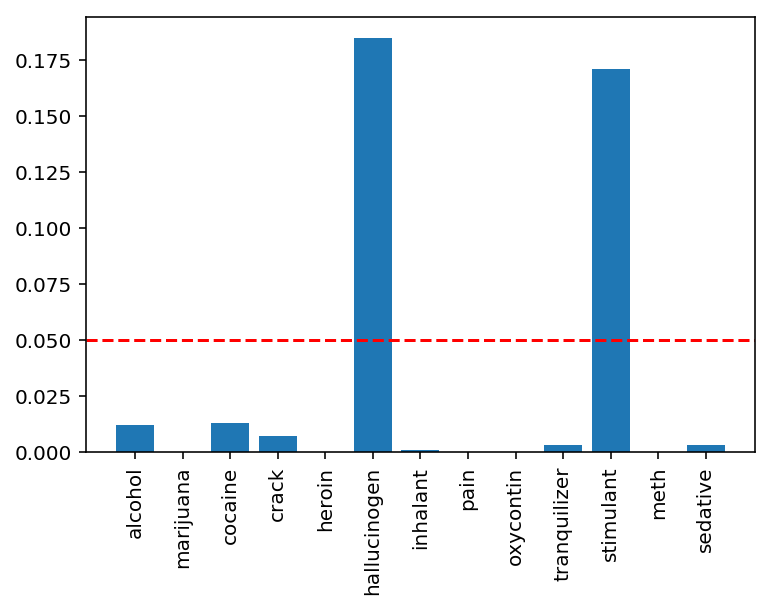

In [148]:
import scipy.stats as stats

p_val_list=[]
col_list=[]

for i in range(rng):
    i=i*2+2
    print ('Doing t-test on {} and {}'.format(drug_data_cleaned.columns[i], drug_data_cleaned.columns[i+1]))
    p_val=stats.ttest_ind(drug_data_cleaned.iloc[:,i], drug_data_cleaned.iloc[:,i+1])[1]
    p_val_list.append(p_val)
    col_list.append(drug_data_cleaned.columns[i].split('-')[0])
    print ('p-value is {} \n'.format(p_val))

plt.bar(range(len(p_val_list)), p_val_list)
plt.xticks(range(len(p_val_list)), col_list, rotation=90)
plt.axhline(0.05, linestyle='--', color='r')
plt.show()

**Report**

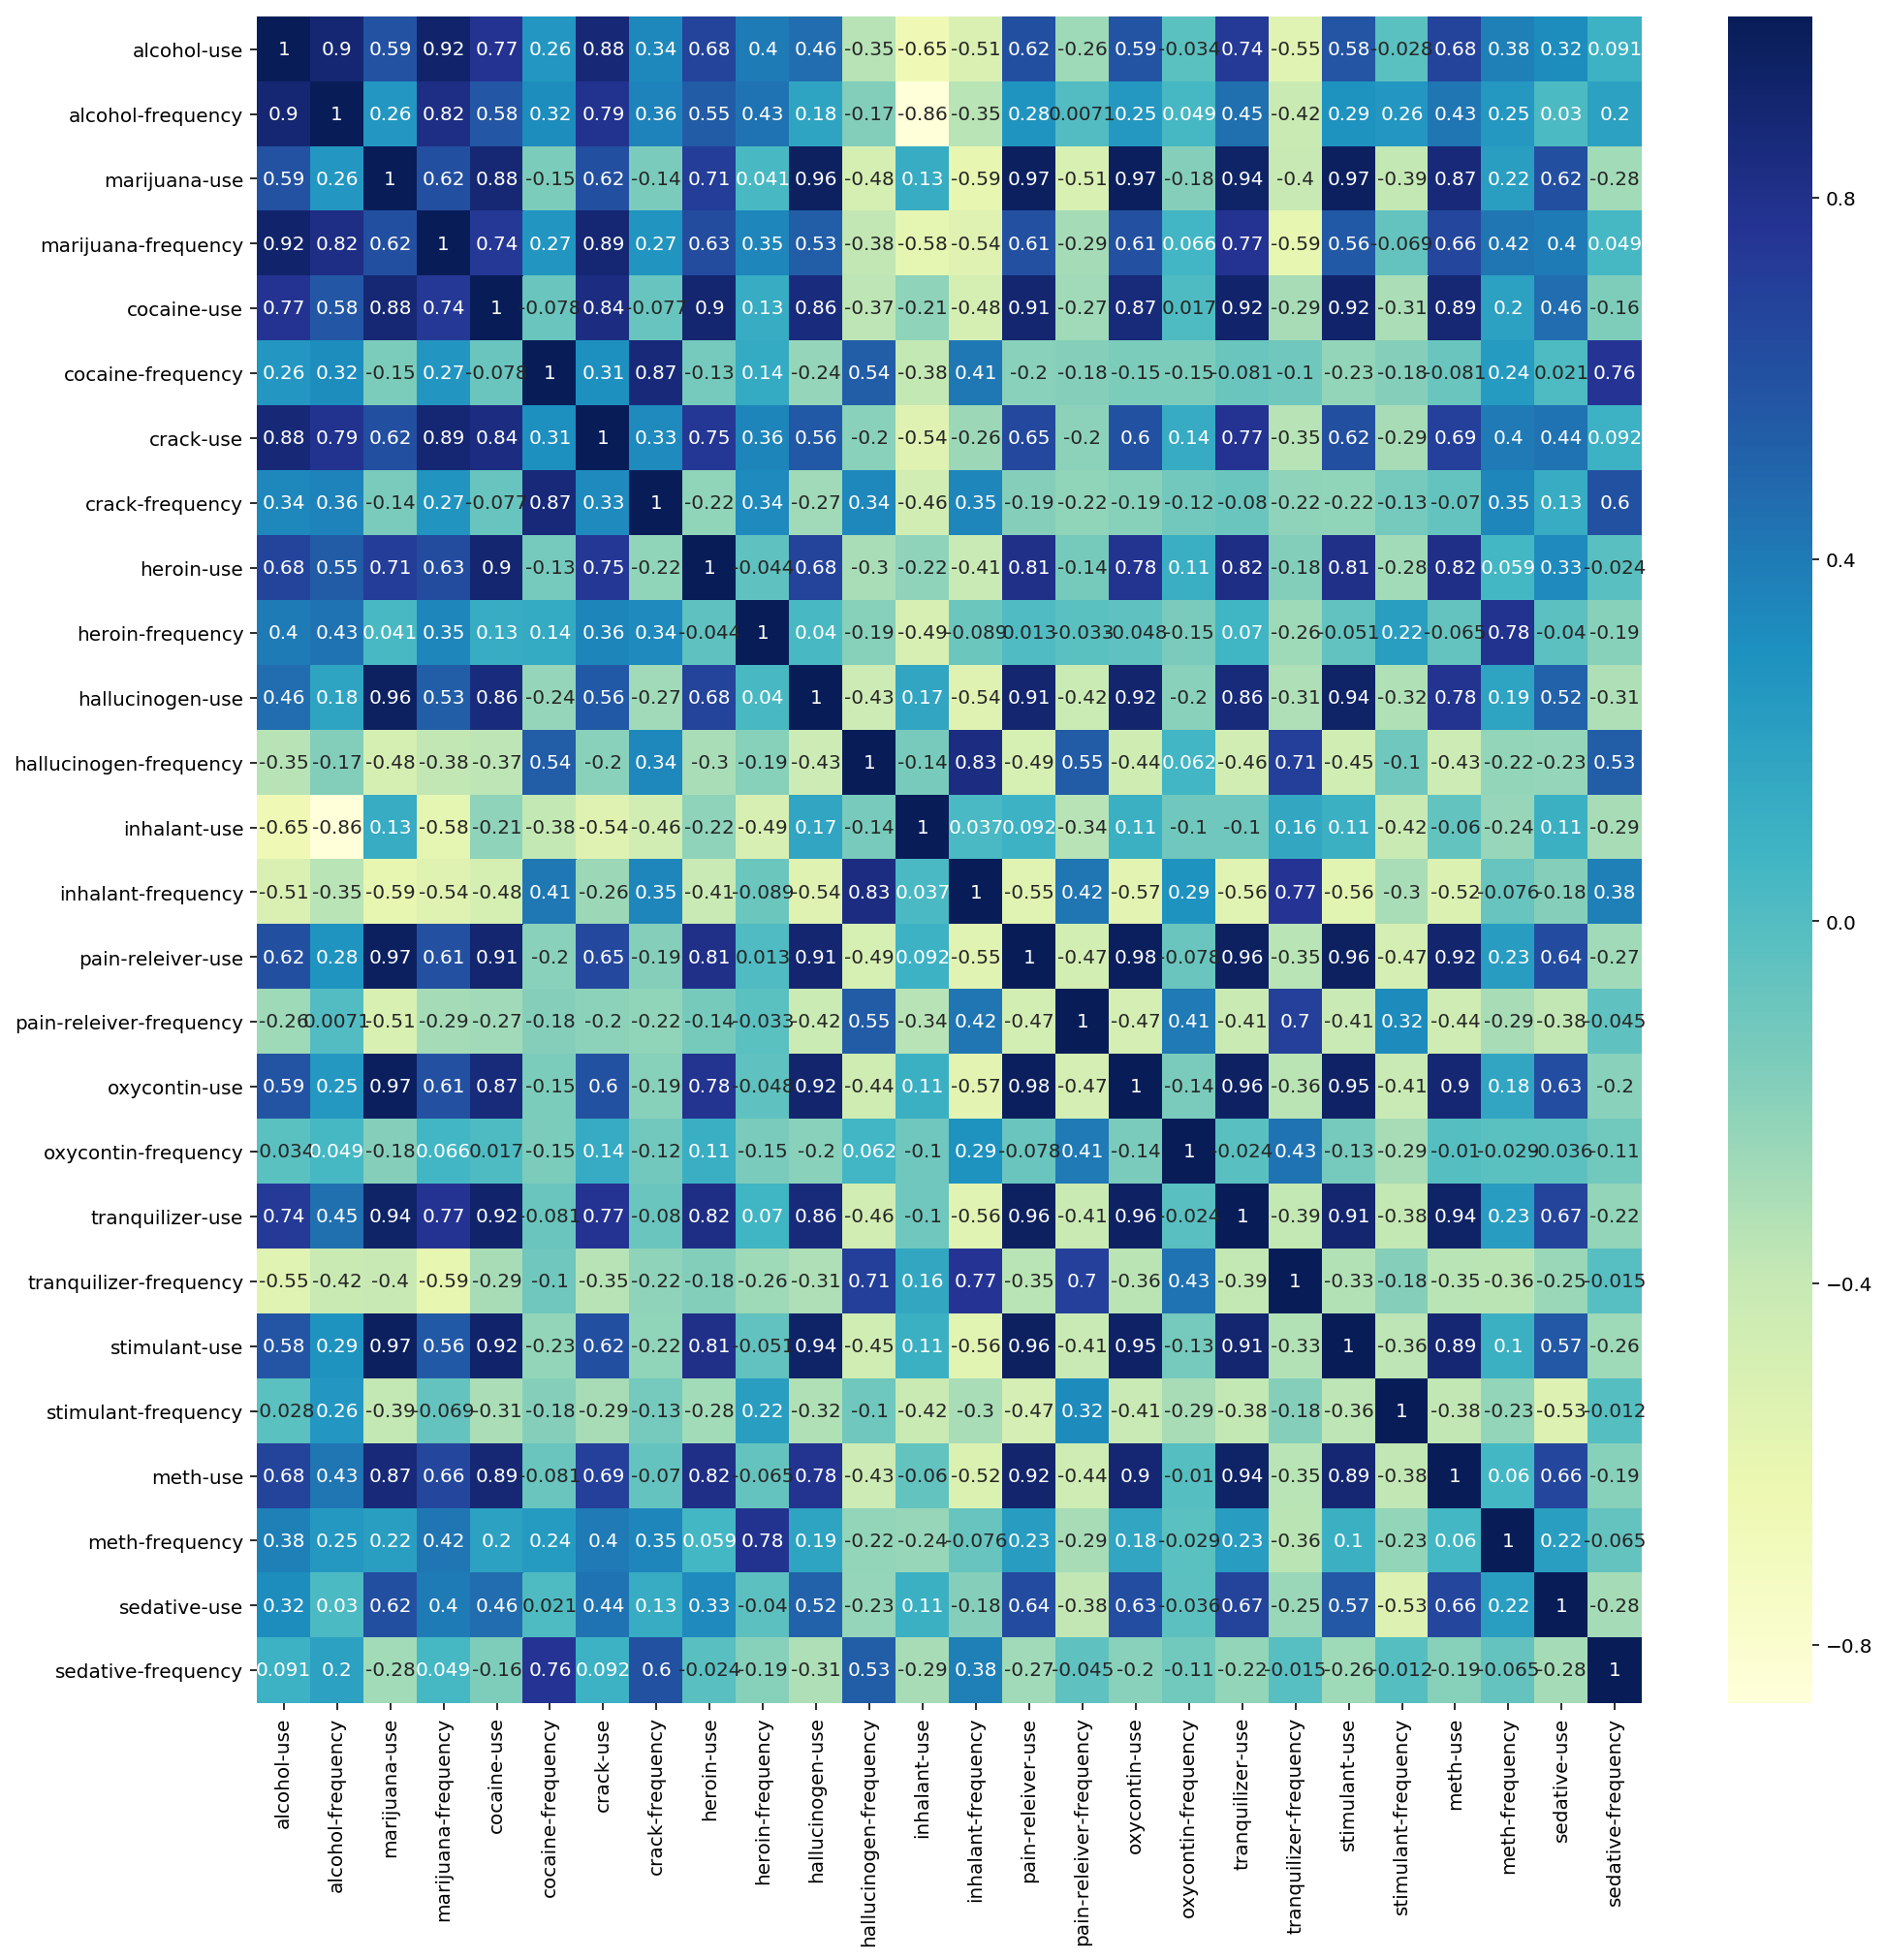

In [149]:
drug_corr = drug_data_cleaned.iloc[:,2:].corr()
plt.figure(figsize=(16,16))
sns.heatmap(drug_corr, annot=True,cmap="YlGnBu")

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [150]:
mask=data[data['Math']>450]

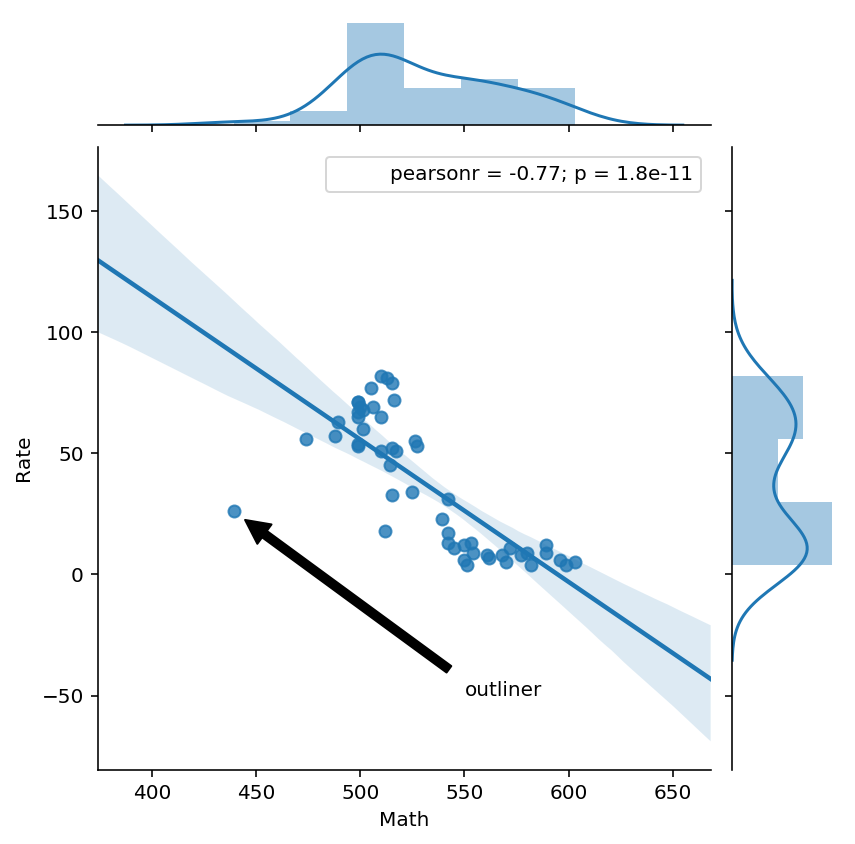

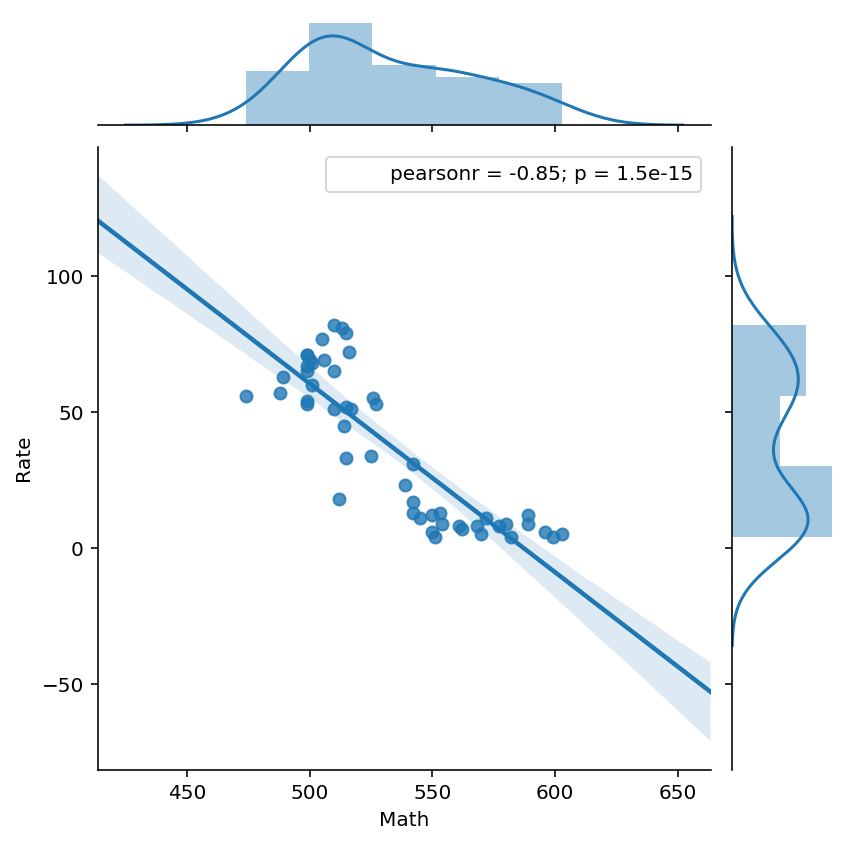

In [151]:
sns.jointplot('Math','Rate',data=data,kind='reg')
plt.gca().annotate('outliner',xy= (439,26), xytext=(550,-50), arrowprops=dict(facecolor='black', shrink=0.05))
sns.jointplot('Math','Rate',data=mask, kind='reg')

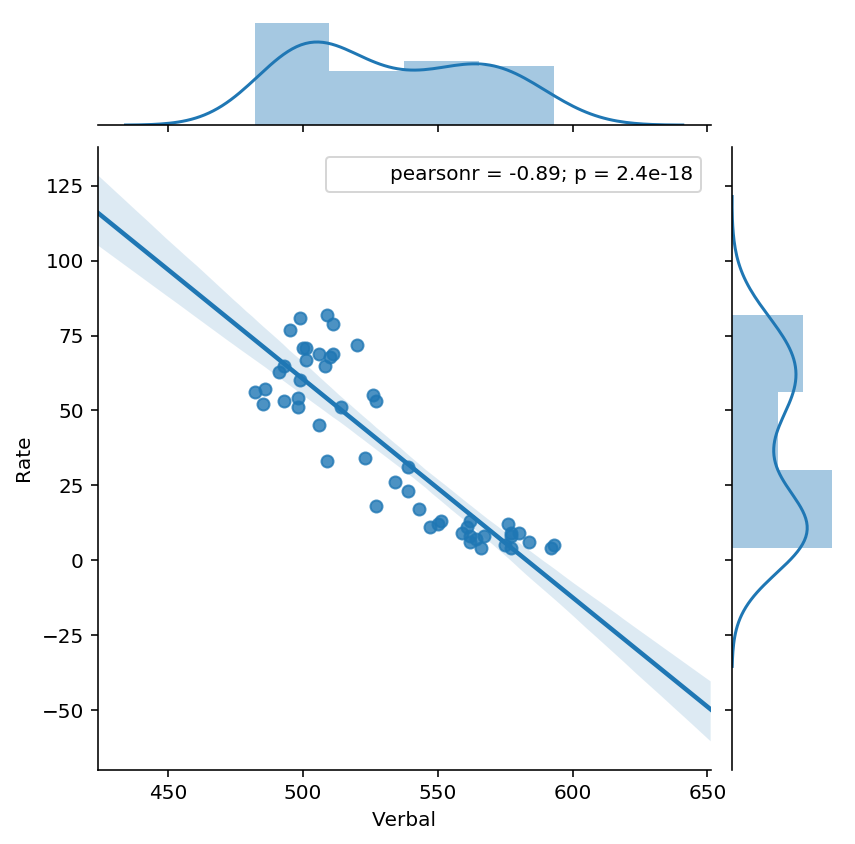

In [152]:
sns.jointplot('Verbal','Rate',data=data,kind='reg')

In [153]:
mask.describe()

,Rate,Verbal,Math,Verbal_Scaled,Math_Scaled,Rate_Scaled,Verbal_Sub_Math
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.372549,531.980392,533.313725,-0.001180,0.050852,0.008089,-1.333333
std,27.527412,33.565751,33.890111,1.019768,0.950181,1.018101,8.387292
min,4.000000,482.000000,474.000000,-1.519644,-1.612135,-1.226195,-30.000000
25%,9.000000,501.000000,505.500000,-0.942401,-0.728965,-1.041270,-6.000000
50%,34.000000,526.000000,525.000000,-0.182871,-0.182241,-0.116645,0.000000
75%,64.000000,562.000000,557.500000,0.910852,0.728965,0.992905,4.000000
max,82.000000,593.000000,603.000000,1.852669,2.004654,1.658635,15.000000


In [154]:
data.describe()

,Rate,Verbal,Math,Verbal_Scaled,Math_Scaled,Rate_Scaled,Verbal_Sub_Math
count,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000
mean,37.153846,532.019231,531.500000,1.661064e-15,-1.633309e-16,-1.814788e-17,0.519231
std,27.301788,33.236225,36.014975,1.009756e+00,1.009756e+00,1.009756e+00,15.729939
min,4.000000,482.000000,439.000000,-1.519644e+00,-2.593434e+00,-1.226195e+00,-30.000000
25%,9.000000,501.000000,504.000000,-9.424014e-01,-7.710209e-01,-1.041270e+00,-6.000000
50%,33.500000,526.500000,521.000000,-1.676808e-01,-2.943898e-01,-1.351375e-01,0.000000
75%,63.500000,562.000000,555.750000,9.108517e-01,6.799003e-01,9.744122e-01,4.250000
max,82.000000,593.000000,603.000000,1.852669e+00,2.004654e+00,1.658635e+00,95.000000


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [155]:
spearman_sat = data[['Math', 'Verbal']].corr(method='spearman')
pearson_sat = data[['Math','Verbal']].corr(method='pearson')
print (spearman_sat)
print (pearson_sat)

            Math    Verbal
Math    1.000000  0.905205
Verbal  0.905205  1.000000
            Math    Verbal
Math    1.000000  0.899871
Verbal  0.899871  1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

23    56.730769
Name: Rate_Percentile, dtype: float64


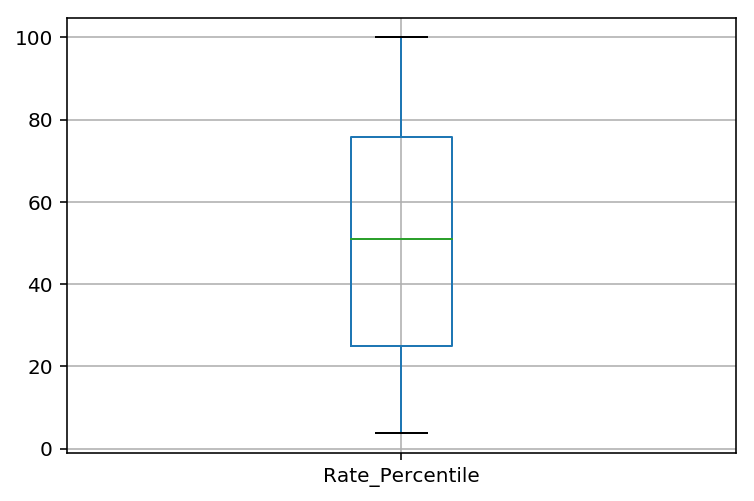

In [156]:
data['Rate_Percentile']=[stats.percentileofscore(data['Rate'], i) for i in data['Rate']]

print (data['Rate_Percentile'][data['State'] == 'CA'])

data[['Rate_Percentile']].boxplot()

In [157]:
data.head()

,State,Rate,Verbal,Math,Verbal_Scaled,Math_Scaled,Rate_Scaled,Verbal_Sub_Math,Rate_Percentile
0,CT,82,509,510,-0.699352,-0.602798,1.658635,-1,100.000000
1,NJ,81,499,513,-1.003164,-0.518687,1.621650,-14,98.076923
2,MA,79,511,515,-0.638589,-0.462613,1.547680,-4,96.153846
3,NY,77,495,505,-1.124689,-0.742984,1.473710,-10,94.230769
4,NH,72,520,516,-0.365159,-0.434575,1.288785,4,92.307692


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [158]:
inhalant_percentile=np.array([stats.percentileofscore(drug_data_cleaned['inhalant-frequency'], i) for i in drug_data_cleaned['inhalant-frequency']])

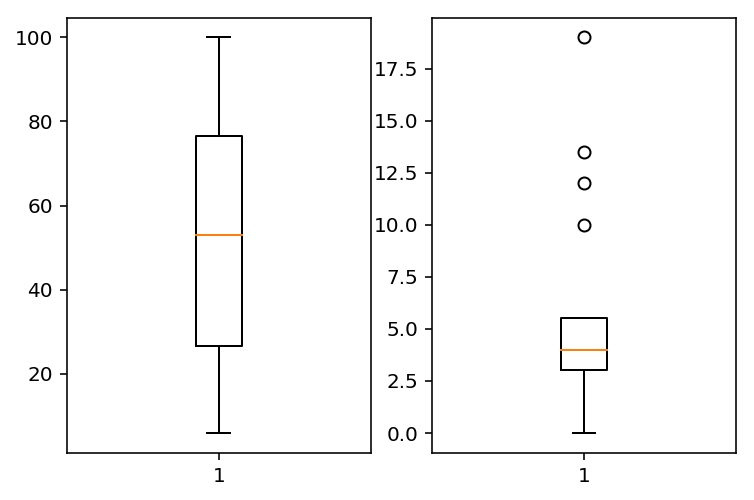

In [159]:
plt.subplot(121)
plt.boxplot(inhalant_percentile)
plt.subplot(122)
plt.boxplot(drug_data_cleaned['inhalant-frequency'])
plt.show()

In [160]:
data.tail()

,State,Rate,Verbal,Math,Verbal_Scaled,Math_Scaled,Rate_Scaled,Verbal_Sub_Math,Rate_Percentile
47,IA,5,593,603,1.852669,2.004654,-1.189210,-10,8.653846
48,SD,4,577,582,1.366570,1.415875,-1.226195,-5,3.846154
49,ND,4,592,599,1.822288,1.892506,-1.226195,-7,3.846154
50,MS,4,566,551,1.032376,0.546724,-1.226195,15,3.846154
51,All,45,506,514,-0.790495,-0.490650,0.290190,-8,53.846154


In [161]:
from mpl_toolkits.basemap import Basemap as Basemap

In [162]:
us_state_abbrev = {
    'AL':'Alabama',
    'AK':'Alaska',
    'AZ':'Arizona',
    'AR':'Arkansas',
    'CA':'California',
    'CO':'Colorado',
    'CT':'Connecticut',
    'DC': 'District of Columbia',
    'DE':'Delaware',
    'FL':'Florida',
    'GA':'Georgia',
    'HI':'Hawaii',
    'ID':'Idaho',
    'IL':'Illinois',
    'IN':'Indiana',
    'IA':'Iowa',
    'KS':'Kansas',
    'KY':'Kentucky',
    'LA':'Louisiana',
    'ME':'Maine',
    'MD':'Maryland',
    'MA':'Massachusetts',
    'MI':'Michigan',
    'MN':'Minnesota',
    'MS':'Mississippi',
    'MO':'Missouri',
    'MT':'Montana',
    'NE':'Nebraska',
    'NV':'Nevada',
    'NH':'New Hampshire',
    'NJ':'New Jersey',
    'NM':'New Mexico',
    'NY':'New York',
    'NC':'North Carolina',
    'ND':'North Dakota',
    'OH':'Ohio',
    'OK':'Oklahoma',
    'OR':'Oregon',
    'PA':'Pennsylvania',
    'RI':'Rhode Island',
    'SC':'South Carolina',
    'SD':'South Dakota',
    'TN':'Tennessee',
    'TX':'Texas',
    'UT':'Utah',
    'VT':'Vermont',
    'VA':'Virginia',
    'WA':'Washington',
    'WV':'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

In [163]:
data['State_name']=data['State'].map(us_state_abbrev)

In [164]:
popdensity={data['State_name'][i]: data['Rate'][i] for i in range(len(data['State_name'])) if data['State'][i] !='All'}

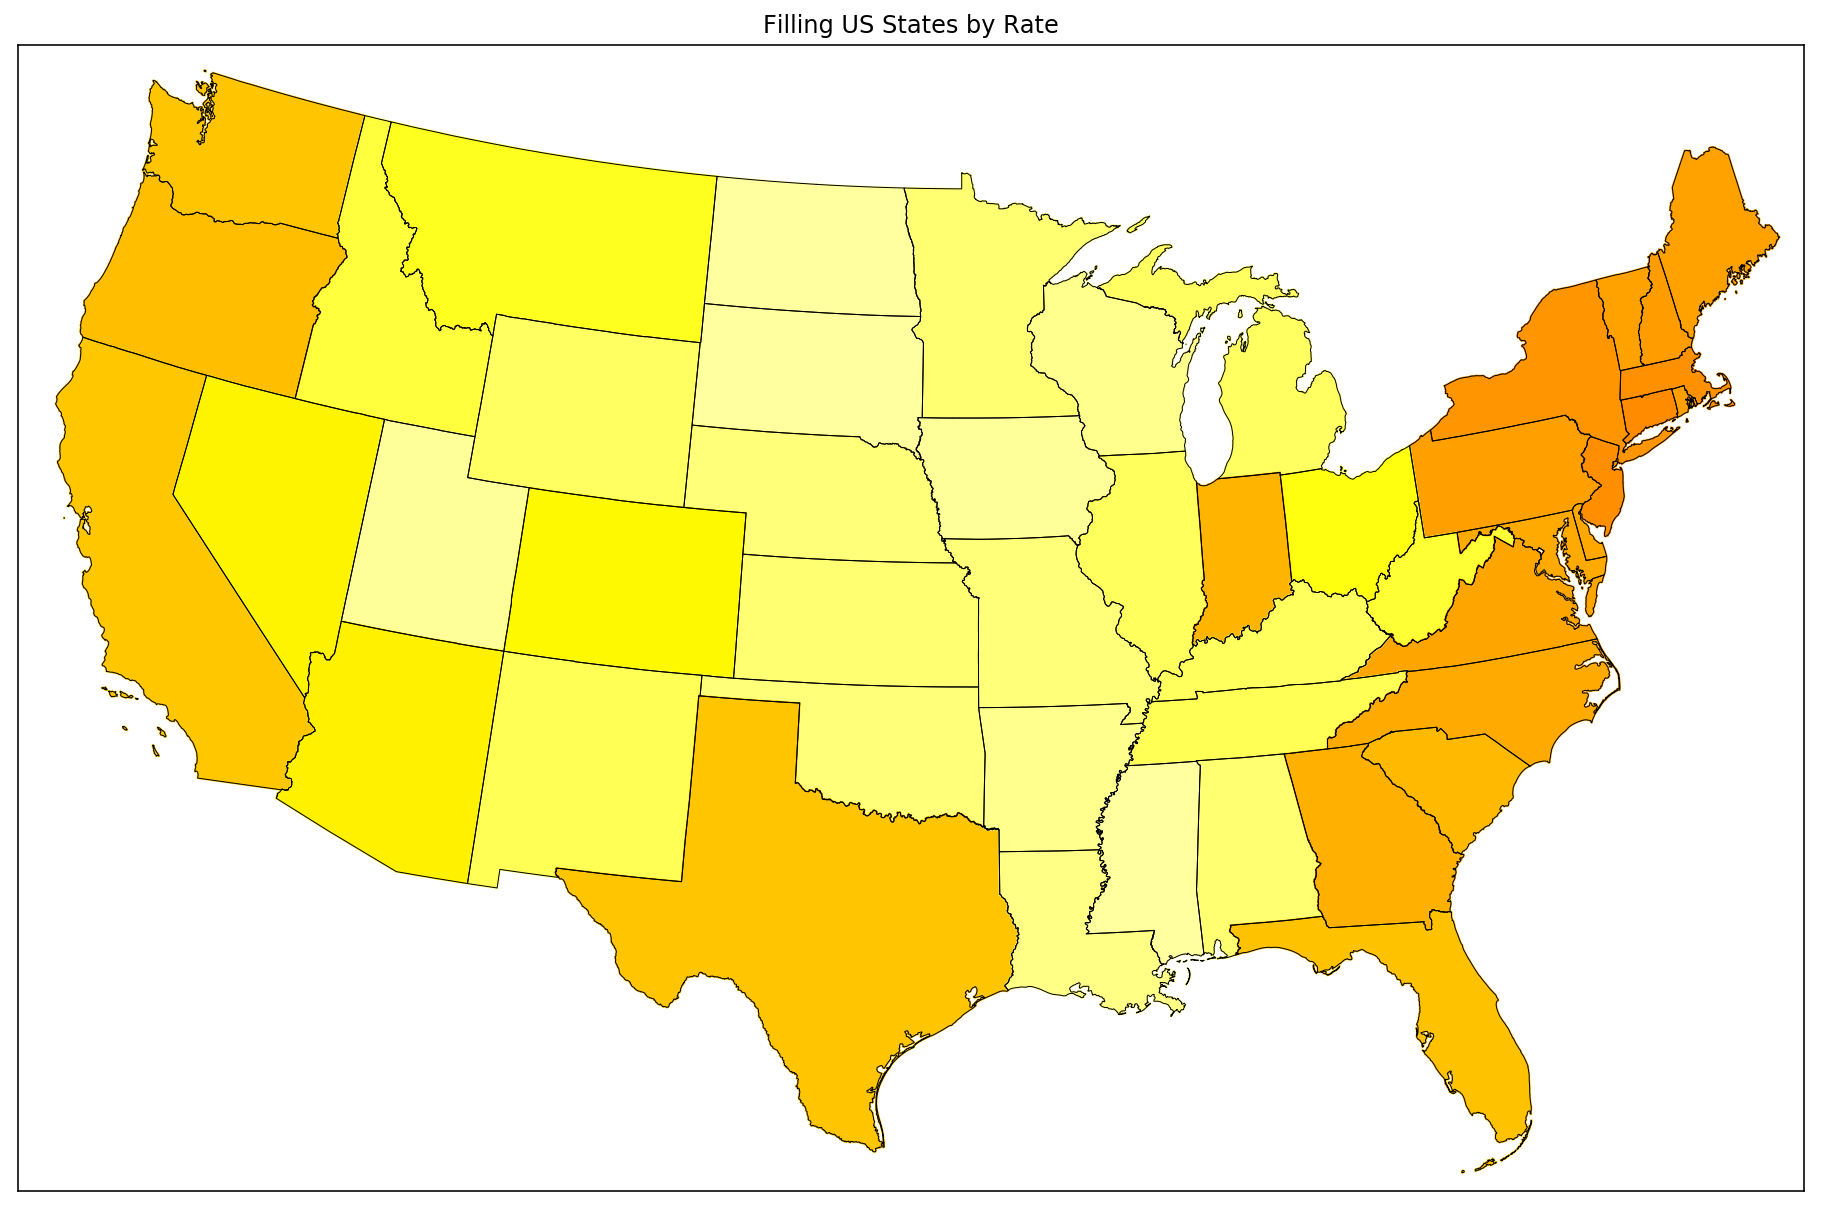

In [169]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
plt.figure(figsize=(16,16))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.

ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling US States by Rate')
plt.show()